In [1]:
pip install contextily


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import mpl_toolkits

In [3]:
data=pd.read_csv(r"C:\Users\snega\Desktop\python\Road accident\only_road_accidents_data3.csv")

In [4]:
data.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [5]:
data.shape

(490, 11)

In [6]:
data.isna().any()

STATE/UT             False
YEAR                 False
0-3 hrs. (Night)     False
3-6 hrs. (Night)     False
6-9 hrs (Day)        False
9-12 hrs (Day)       False
12-15 hrs (Day)      False
15-18 hrs (Day)      False
18-21 hrs (Night)    False
21-24 hrs (Night)    False
Total                False
dtype: bool

In [7]:
data.describe()

,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
count,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2007.500000,796.320408,969.236735,1371.15102,1753.967347,1681.814286,1850.283673,1782.918367,1228.810204,11434.502041
std,4.035249,1210.999326,1415.984501,1864.19157,2400.593532,2326.251665,2643.765262,2587.452453,1836.242850,15948.689470
min,2001.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,10.000000,15.000000,36.00000,51.250000,59.250000,59.000000,50.000000,25.250000,357.750000
50%,2007.500000,200.000000,251.500000,498.50000,678.000000,679.500000,669.000000,517.000000,343.500000,4174.500000
75%,2011.000000,1114.250000,1355.250000,2073.75000,2680.500000,2265.500000,2289.000000,2072.000000,1594.750000,16463.500000
max,2014.000000,6020.000000,6545.000000,8241.00000,14568.000000,11089.000000,13789.000000,13927.000000,10364.000000,75480.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE/UT           490 non-null    object
 1   YEAR               490 non-null    int64 
 2   0-3 hrs. (Night)   490 non-null    int64 
 3   3-6 hrs. (Night)   490 non-null    int64 
 4   6-9 hrs (Day)      490 non-null    int64 
 5   9-12 hrs (Day)     490 non-null    int64 
 6   12-15 hrs (Day)    490 non-null    int64 
 7   15-18 hrs (Day)    490 non-null    int64 
 8   18-21 hrs (Night)  490 non-null    int64 
 9   21-24 hrs (Night)  490 non-null    int64 
 10  Total              490 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 42.2+ KB


([<matplotlib.axis.XTick at 0x1fb8697aed0>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014')])

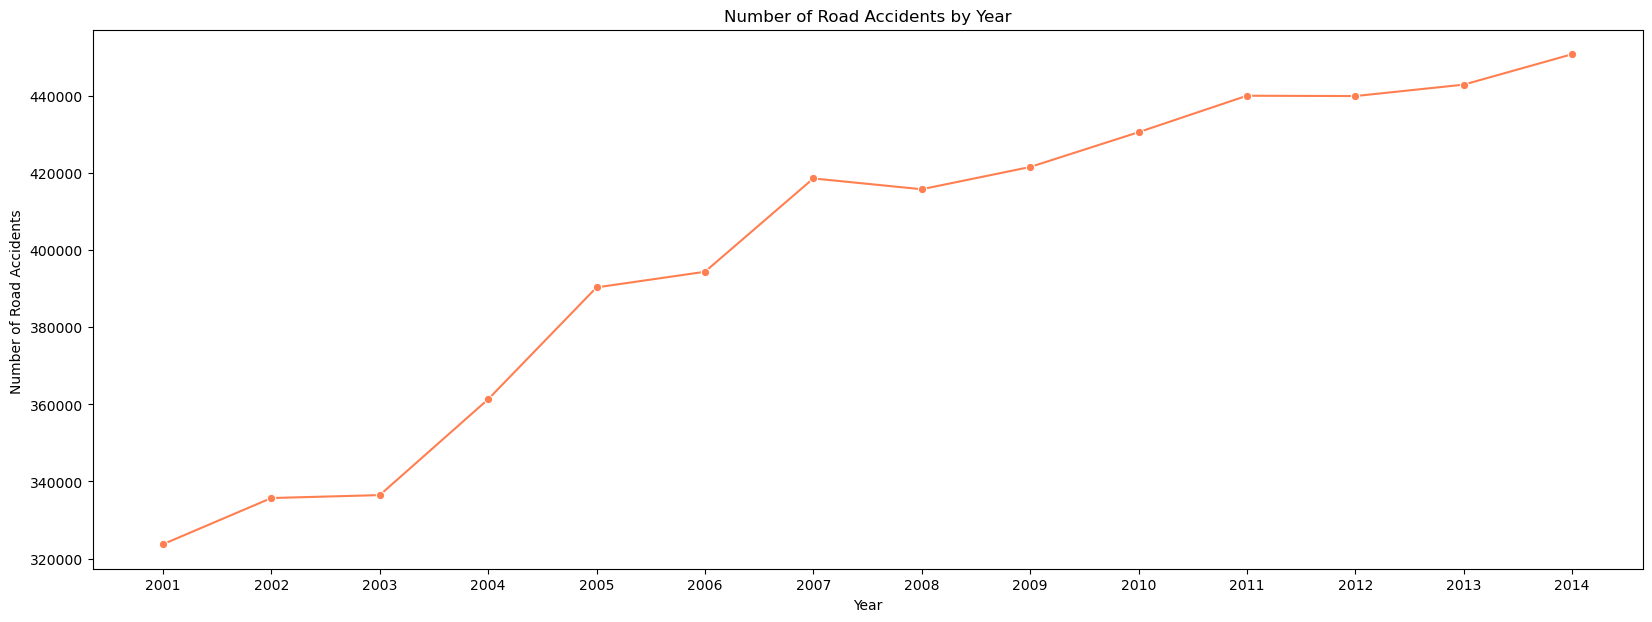

In [9]:
# Road Accidents over the years (counts)

data_over_years = data.loc[:, ["YEAR", "Total"]]
data_over_years = data_over_years.groupby("YEAR").sum()['Total']

#ploting graph

plt.figure(figsize=(20,7))
sns.lineplot(data=data_over_years, color="coral", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Road Accidents ")
plt.title("Number of Road Accidents by Year")
plt.xticks(data_over_years.index)

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ]),
 [Text(-0.02, 0, '−0.02'),
  Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.039999999999999994, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.09999999999999999, 0, '0.10')])

<Figure size 1800x900 with 0 Axes>

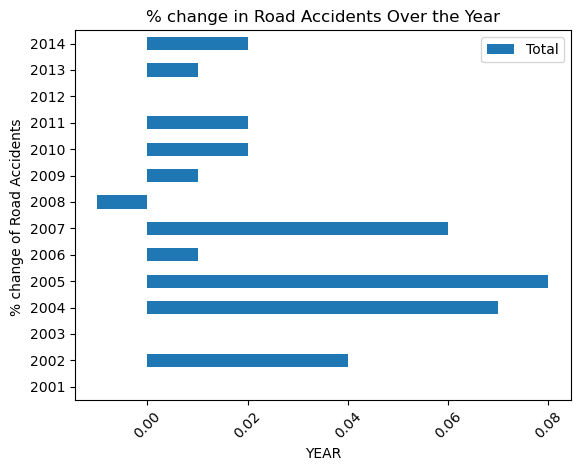

In [10]:
# Road Accidents over the years (% Change over the year)

new_data_over_years = data_over_years.to_frame()
new_data_over_years = new_data_over_years.pct_change().round(2)

#ploting graph

plt.figure(figsize=(18,9))
new_data_over_years.plot(kind='barh')
plt.xlabel("YEAR")
plt.ylabel("% change of Road Accidents ")
plt.title("% change in Road Accidents Over the Year")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Tamil Nadu'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Andhra Pradesh'),
  Text(4, 0, 'Kerala'),
  Text(5, 0, 'Madhya Pradesh'),
  Text(6, 0, 'Rajasthan'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'West Bengal'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Delhi (Ut)'),
  Text(12, 0, 'Chhattisgarh'),
  Text(13, 0, 'Odisha'),
  Text(14, 0, 'Bihar'),
  Text(15, 0, 'Jammu & Kashmir'),
  Text(16, 0, 'Assam'),
  Text(17, 0, 'Punjab'),
  Text(18, 0, 'Jharkhand'),
  Text(19, 0, 'Goa'),
  Text(20, 0, 'Himachal Pradesh'),
  Text(21, 0, 'Puducherry'),
  Text(22, 0, 'Uttarakhand'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Manipur'),
  Text(25, 0, 'Chandigarh'),
  Text(26, 0, 'Meghalaya'),
  Text(27, 0, 'Arunachal Pradesh'),
  Text(28, 0, 'A & N Islands'),
  Text(29, 

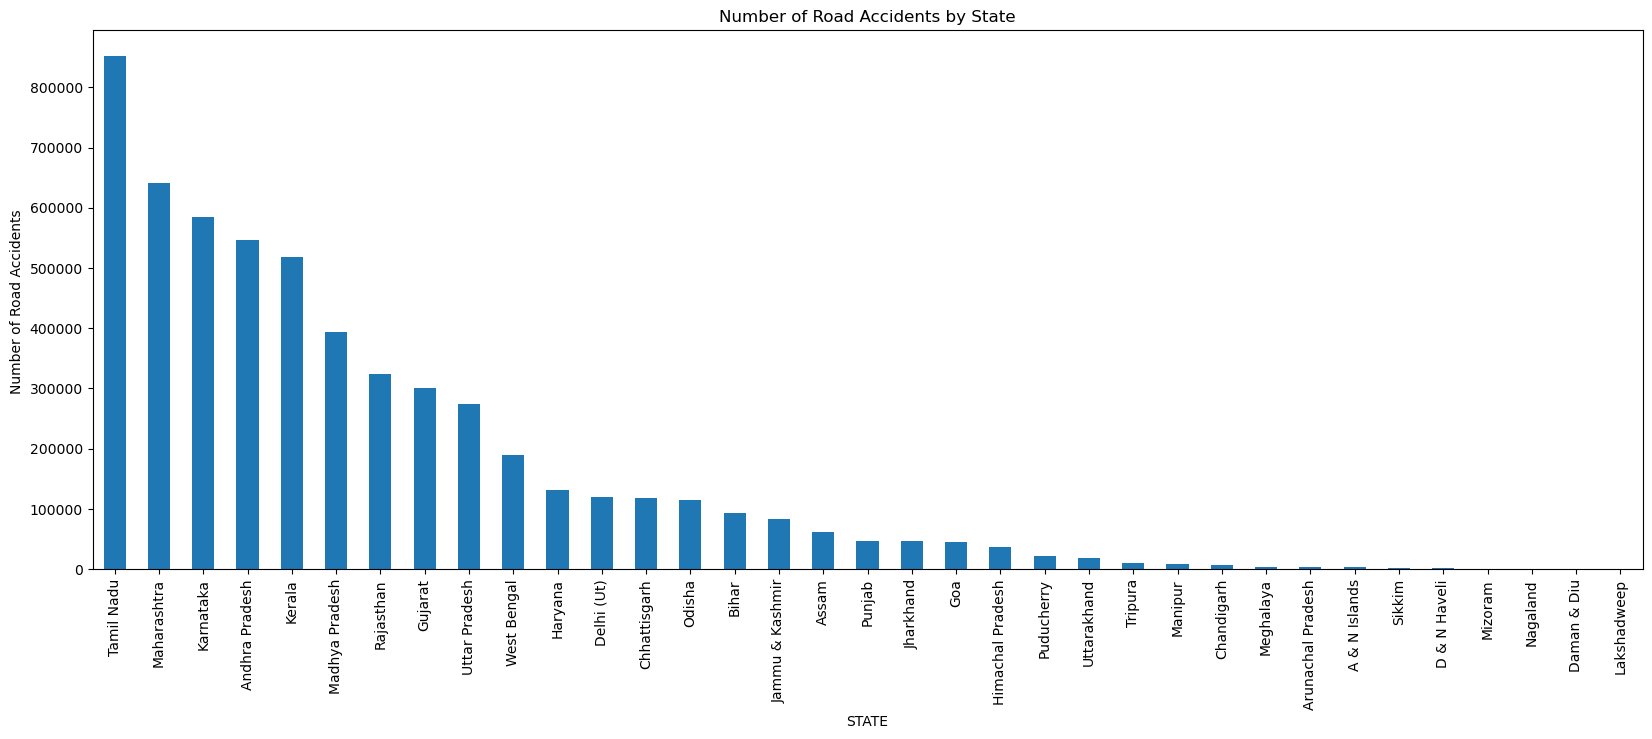

In [11]:
# Number of Road Accidents by State

data_state_over_years = data.loc[:, ["Total", "STATE/UT"]]
data_state_over_years = data_state_over_years.groupby("STATE/UT").sum()['Total']
data_state_over_years = data_state_over_years.sort_values(ascending=False)

#ploting graph

plt.figure(figsize=(20,7))
data_state_over_years.plot(kind='bar')
plt.xlabel("STATE")
plt.ylabel("Number of Road Accidents ")
plt.title("Number of Road Accidents by State")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Road Accidents by YEAR and STATE')

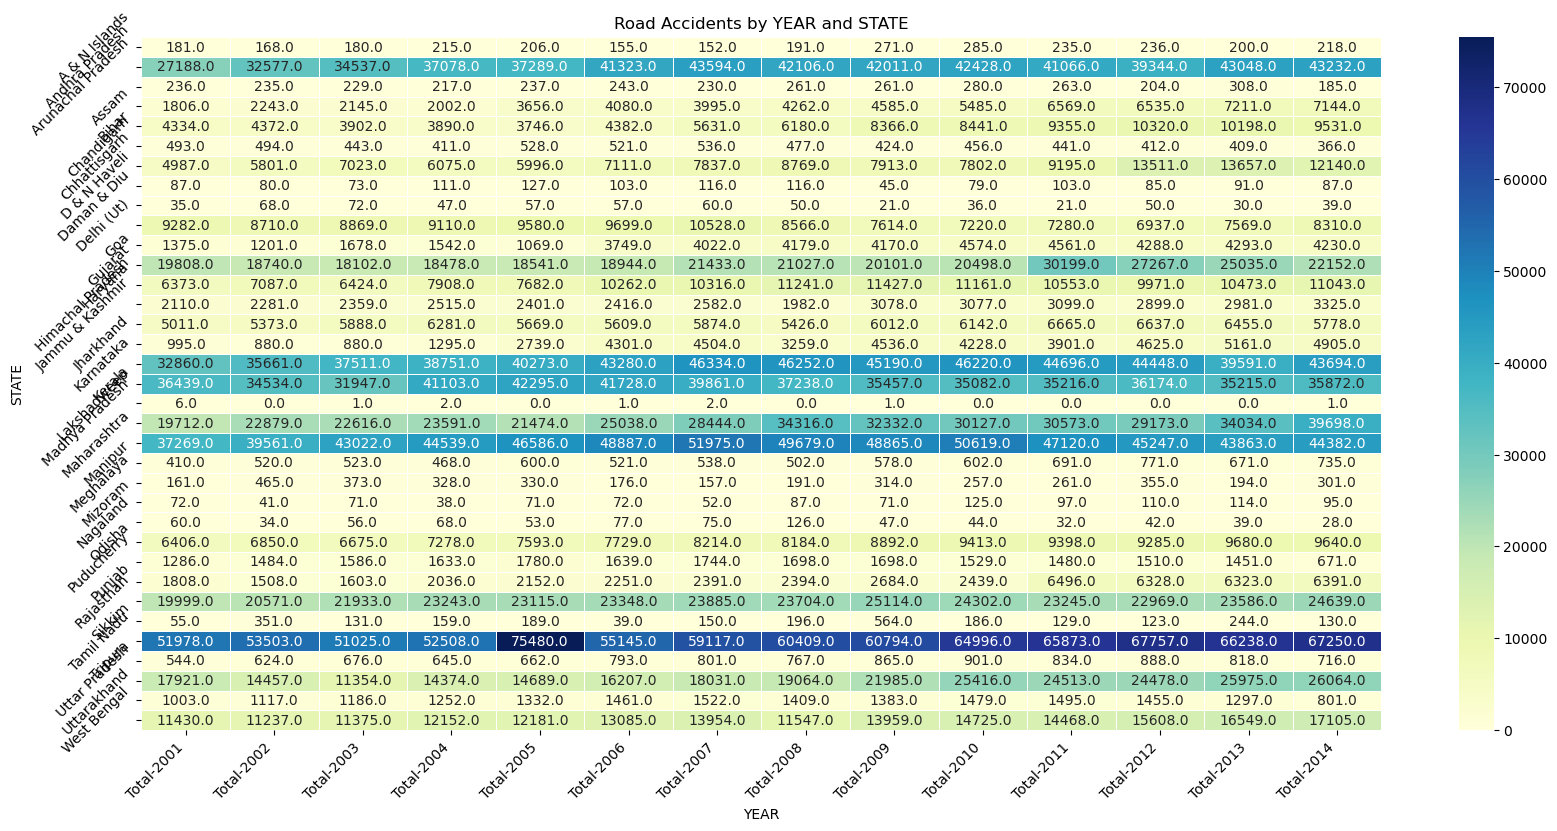

In [12]:
# Road Accidents by YEAR and STATE

data_year_vs_state = data.loc[:, ['STATE/UT', 'YEAR', 'Total']]
data_year_vs_state = data_year_vs_state.groupby(['STATE/UT', 'YEAR'], as_index=False).sum()

data_year_vs_state = pd.pivot_table(data_year_vs_state,index=["STATE/UT"],values=["Total"], columns=["YEAR"])

plt.figure(figsize=(20,9))
sns.heatmap(data=data_year_vs_state, cmap="YlGnBu", annot=True, linewidths=.5, fmt=".1f")
plt.xlabel("YEAR")
plt.ylabel("STATE")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=45,ha='right')
plt.title("Road Accidents by YEAR and STATE")

Text(0.5, 1.0, 'Road Accidents by YEAR and Day Hours')

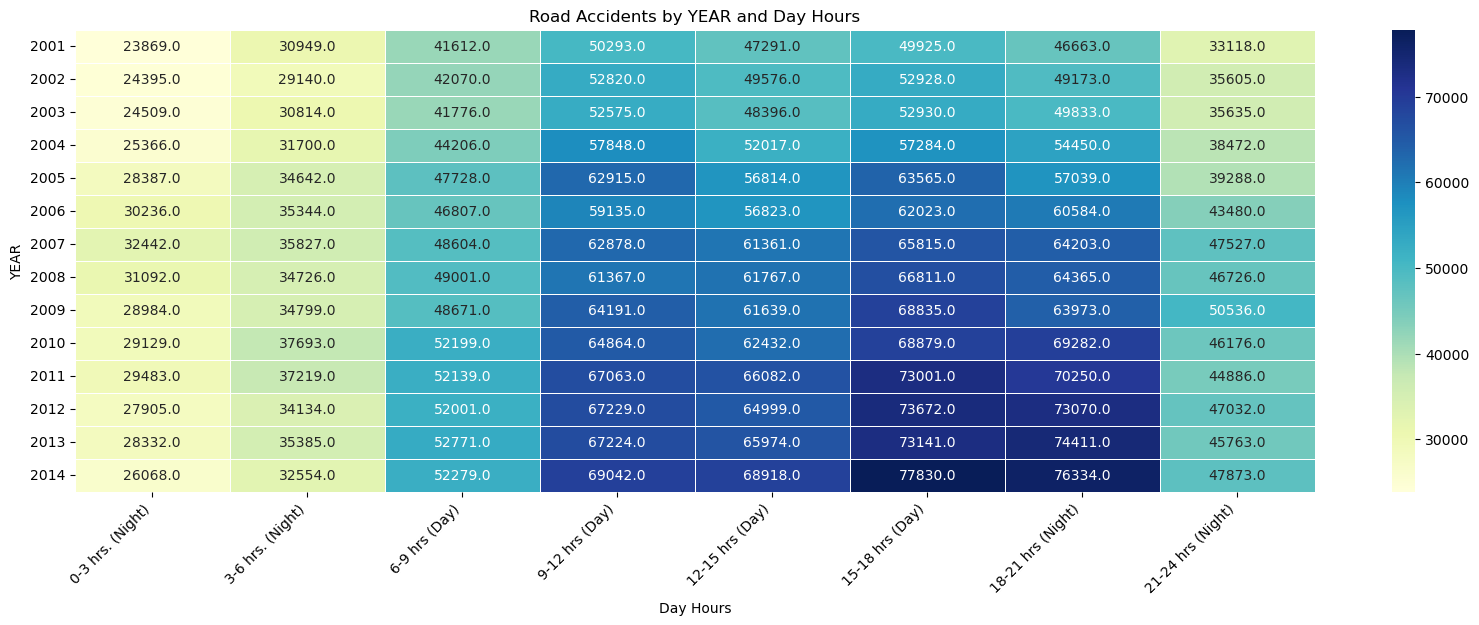

In [13]:
# Road Accidents by YEAR and Day Hours

data_time = data.loc[:,["0-3 hrs. (Night)", "3-6 hrs. (Night)", "6-9 hrs (Day)", "9-12 hrs (Day)",\
                    "12-15 hrs (Day)", "15-18 hrs (Day)", "18-21 hrs (Night)", "21-24 hrs (Night)", "YEAR"]]

data_time = data_time.groupby('YEAR').sum()

plt.figure(figsize=(20,6))
sns.heatmap(data = data_time, cmap="YlGnBu", annot=True, linewidths=.5, fmt="0.1f")
plt.xlabel("Day Hours")
plt.ylabel("YEAR")
plt.xticks(rotation=45,ha='right')
plt.title("Road Accidents by YEAR and Day Hours")


Text(0.5, 1.0, 'Road Accidents by STATE and Day Hours')

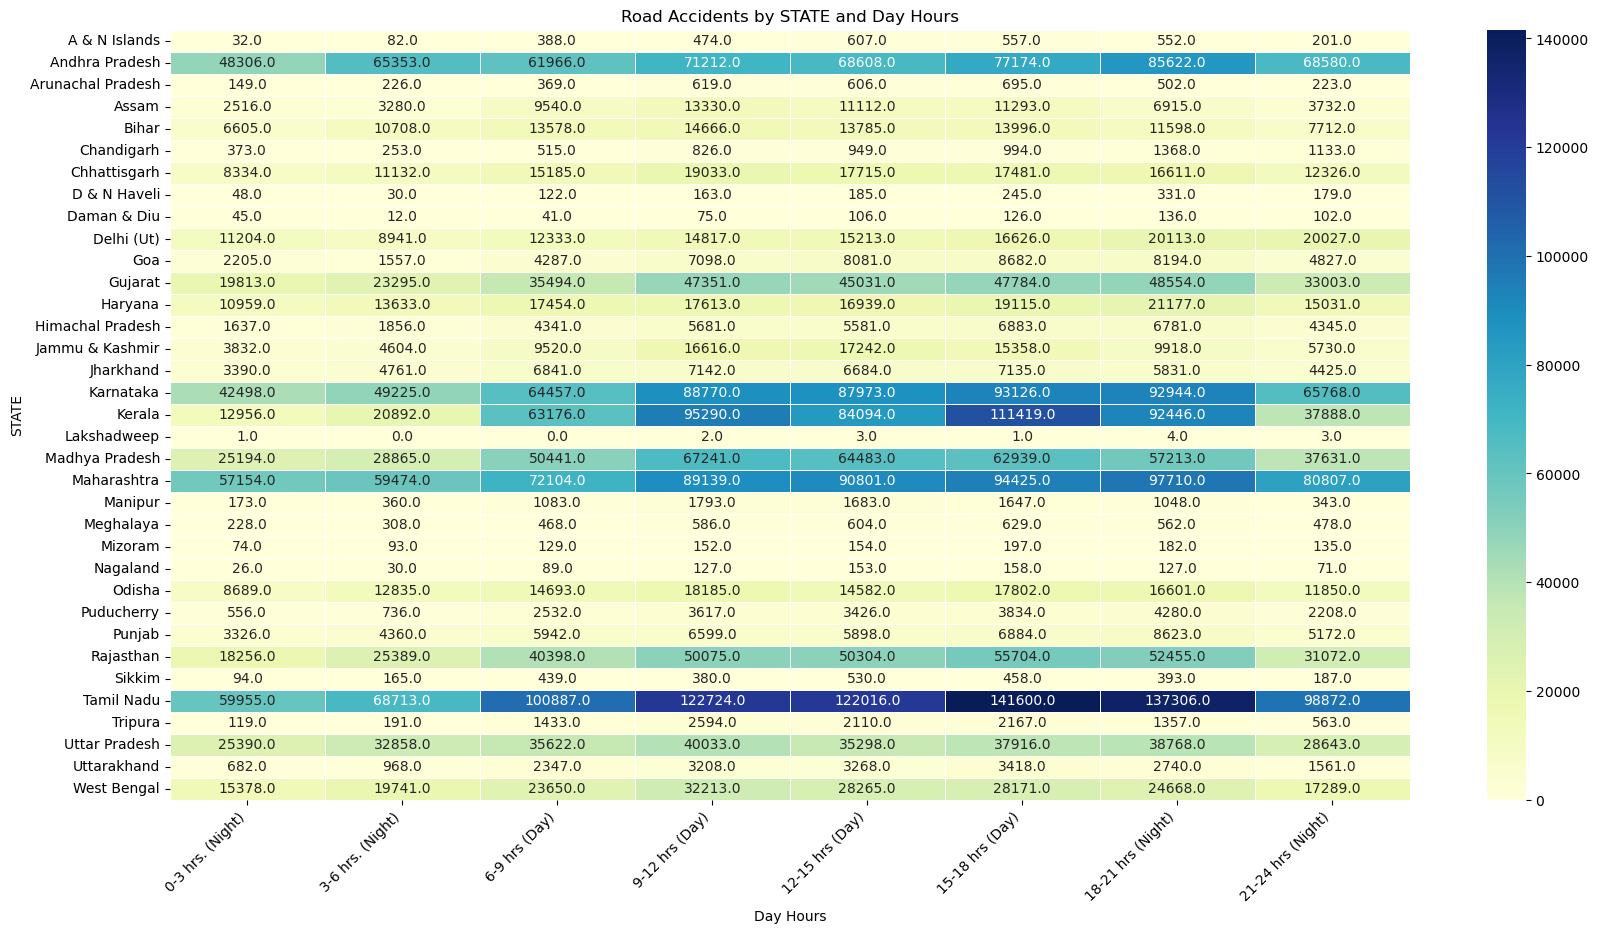

In [14]:
# Road Accidents by STATE and Day Hours

data_time_state = data.loc[:,["0-3 hrs. (Night)", "3-6 hrs. (Night)", "6-9 hrs (Day)", "9-12 hrs (Day)",\
                    "12-15 hrs (Day)", "15-18 hrs (Day)", "18-21 hrs (Night)", "21-24 hrs (Night)", "STATE/UT"]]

data_time_state = data_time_state.groupby('STATE/UT').sum()

plt.figure(figsize=(20,10))
sns.heatmap(data = data_time_state, cmap="YlGnBu", annot=True, linewidths=.5, fmt="0.1f")
plt.xlabel("Day Hours")
plt.ylabel("STATE")
plt.xticks(rotation=45,ha='right')
plt.title("Road Accidents by STATE and Day Hours")

In [15]:
# Number of Road Accidents by top 5 State

def top_n_state_over_year(top, year):
    data_state = data.loc[:, ['YEAR', 'STATE/UT', 'Total']]
    data_state = data_state[data_state['YEAR'] == year].groupby(['STATE/UT'], as_index=False).sum()\
    .sort_values(by=['YEAR', 'Total'], ascending=[True,False]).head(top)
    plt.figure(figsize=(10,5))
    sns.barplot(x="STATE/UT", y="Total", data=data_state)
    plt.title(f"Top {top} States (Road Accidents in Year {year})")
    plt.xlabel("STATE")
    plt.ylabel("Number of Road Accidents")
    plt.xticks(rotation=90)
    return;

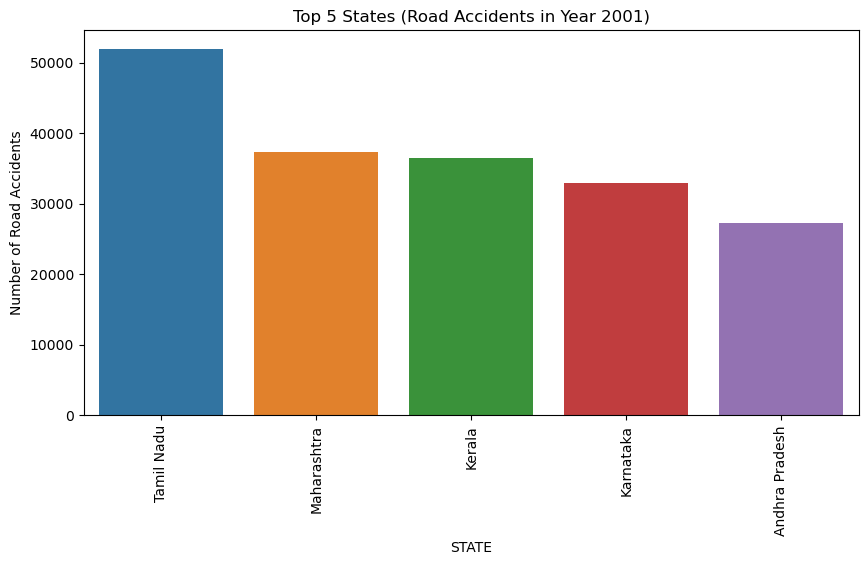

In [16]:
top_n_state_over_year(5, 2001)

In [17]:
data_by_states=data.loc[:,['STATE/UT','YEAR','Total']]

In [18]:
data_by_states.head()

,STATE/UT,YEAR,Total
0,A & N Islands,2001,181
1,A & N Islands,2002,168
2,A & N Islands,2003,180
3,A & N Islands,2004,215
4,A & N Islands,2005,206


In [19]:
df1=data_by_states.drop('YEAR',axis=1)
df1.head()

,STATE/UT,Total
0,A & N Islands,181
1,A & N Islands,168
2,A & N Islands,180
3,A & N Islands,215
4,A & N Islands,206


In [20]:
df1=df1.groupby('STATE/UT').sum().reset_index().sort_values(by='Total',ascending=False)

In [21]:
df1.head()


,STATE/UT,Total
30,Tamil Nadu,852073
20,Maharashtra,641614
16,Karnataka,584761
1,Andhra Pradesh,546821
17,Kerala,518161


Above are the total number of road accidents from 2001-2014

Text(0.5, 1.0, 'Cases of road accidents in each state/UT from 2001-14')

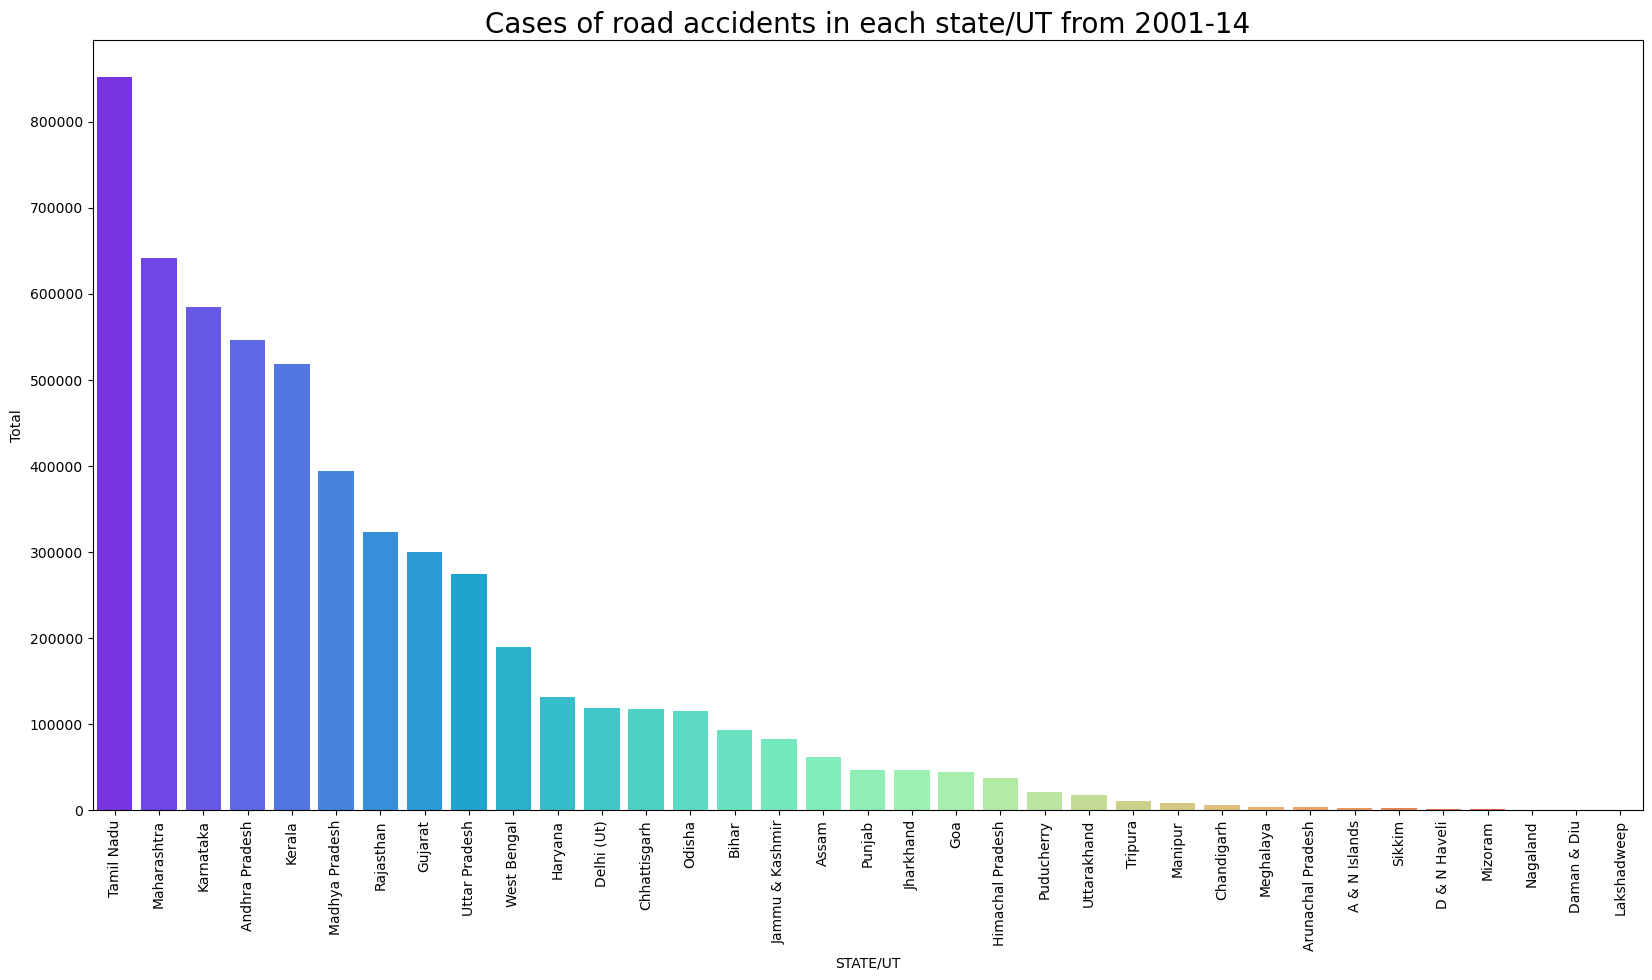

In [22]:
plt.figure(figsize=(20,10))

sns.barplot(x=df1['STATE/UT'],y=df1['Total'],palette='rainbow')
plt.xticks(rotation=90)

plt.title('Cases of road accidents in each state/UT from 2001-14',size=20)

A visual representation of all the road accidents in the states

In [23]:
df_top=df1[df1['Total']>300000]
df_top

,STATE/UT,Total
30,Tamil Nadu,852073
20,Maharashtra,641614
16,Karnataka,584761
1,Andhra Pradesh,546821
17,Kerala,518161
19,Madhya Pradesh,394007
28,Rajasthan,323653
11,Gujarat,300325


Text(0.5, 1.0, 'States with highest road accidents between 2001-14')

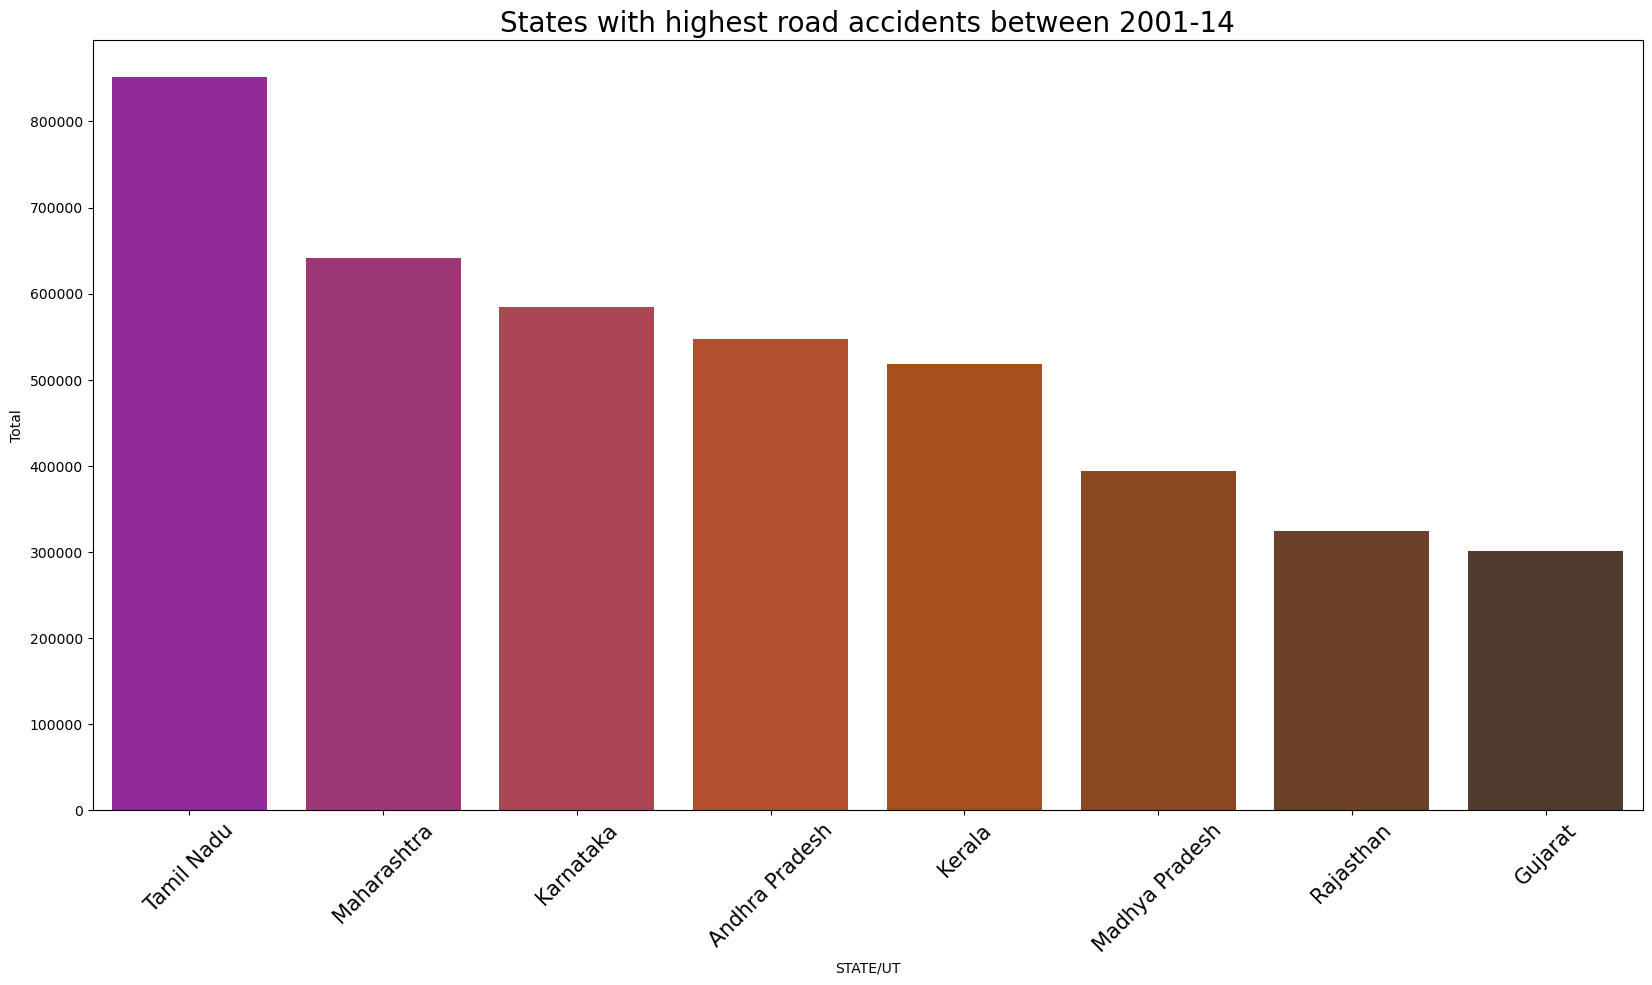

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_top['STATE/UT'],y=df_top['Total'],palette='gnuplot_d')
plt.xticks(size=15,rotation=45)
plt.yticks(size=10)

plt.title('States with highest road accidents between 2001-14',size=20)

The above states have each had above or equal to 3 lakh road accident cases.

In [25]:
df_year=data_by_states.groupby('YEAR').sum().reset_index()

C:\Users\snega\AppData\Local\Temp\ipykernel_1348\2489570174.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [26]:
df_year

,YEAR,Total
0,2001,323720
1,2002,335707
2,2003,336468
3,2004,361343
4,2005,390378
5,2006,394432
6,2007,418657
7,2008,415855
8,2009,421628
9,2010,430654


In [27]:
df_year['Percentage change']=df_year['Total'].pct_change().round(2)
df_year

,YEAR,Total,Percentage change
0,2001,323720,NaN
1,2002,335707,0.04
2,2003,336468,0.00
3,2004,361343,0.07
4,2005,390378,0.08
5,2006,394432,0.01
6,2007,418657,0.06
7,2008,415855,-0.01
8,2009,421628,0.01
9,2010,430654,0.02


([<matplotlib.axis.XTick at 0x1fb8a900d10>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014')])

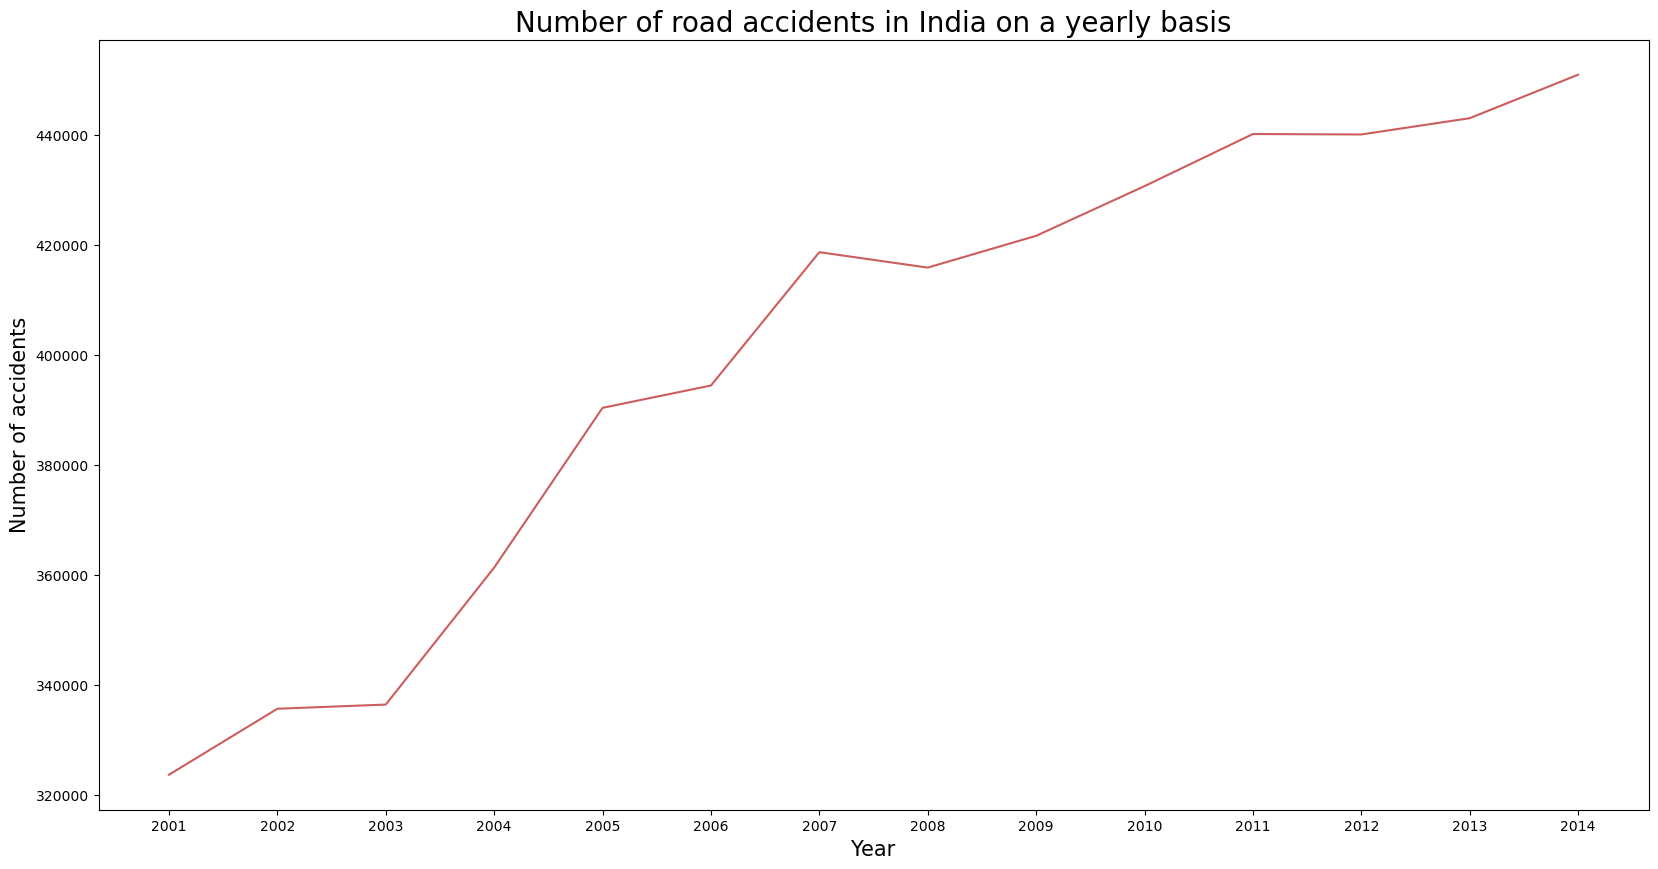

In [28]:
plt.figure(figsize=(20,10))

plt.plot(df_year['YEAR'],df_year['Total'], color='indianred')
plt.title('Number of road accidents in India on a yearly basis',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of accidents',size=15)
plt.xticks(np.arange(2001,2015,1),size=10)

The above data shows that there is a positive increase of road accidents each year.

([<matplotlib.axis.YTick at 0x1fb8a113c10>,
 [Text(0, -0.02, '−0.02'),
  Text(0, -0.01, '−0.01'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.009999999999999998, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.030000000000000002, '0.03'),
  Text(0, 0.039999999999999994, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.06999999999999999, '0.07'),
  Text(0, 0.08, '0.08')])

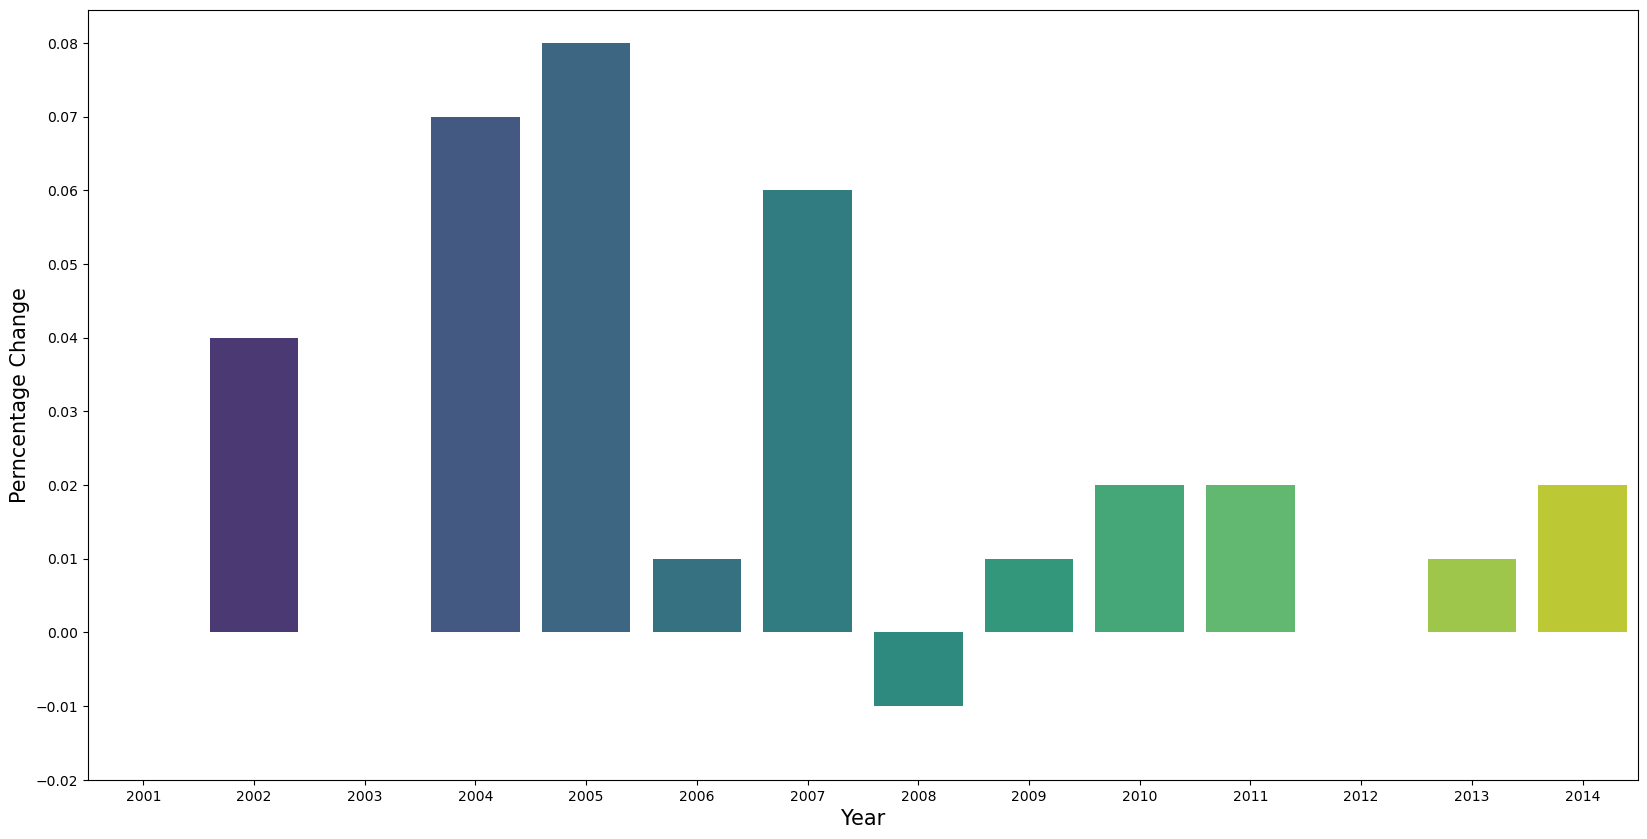

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_year['YEAR'],y=df_year['Percentage change'],palette='viridis')
plt.xlabel('Year',size=15)
plt.ylabel('Perncentage Change',size=15)
plt.yticks(np.arange(-0.02,0.09,0.01))

From the above plots, it can be seen that apart from the year 2008, every other has recorded an increase or the same number of accidents in the country

([<matplotlib.axis.XTick at 0x1fb8a17d490>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014')])

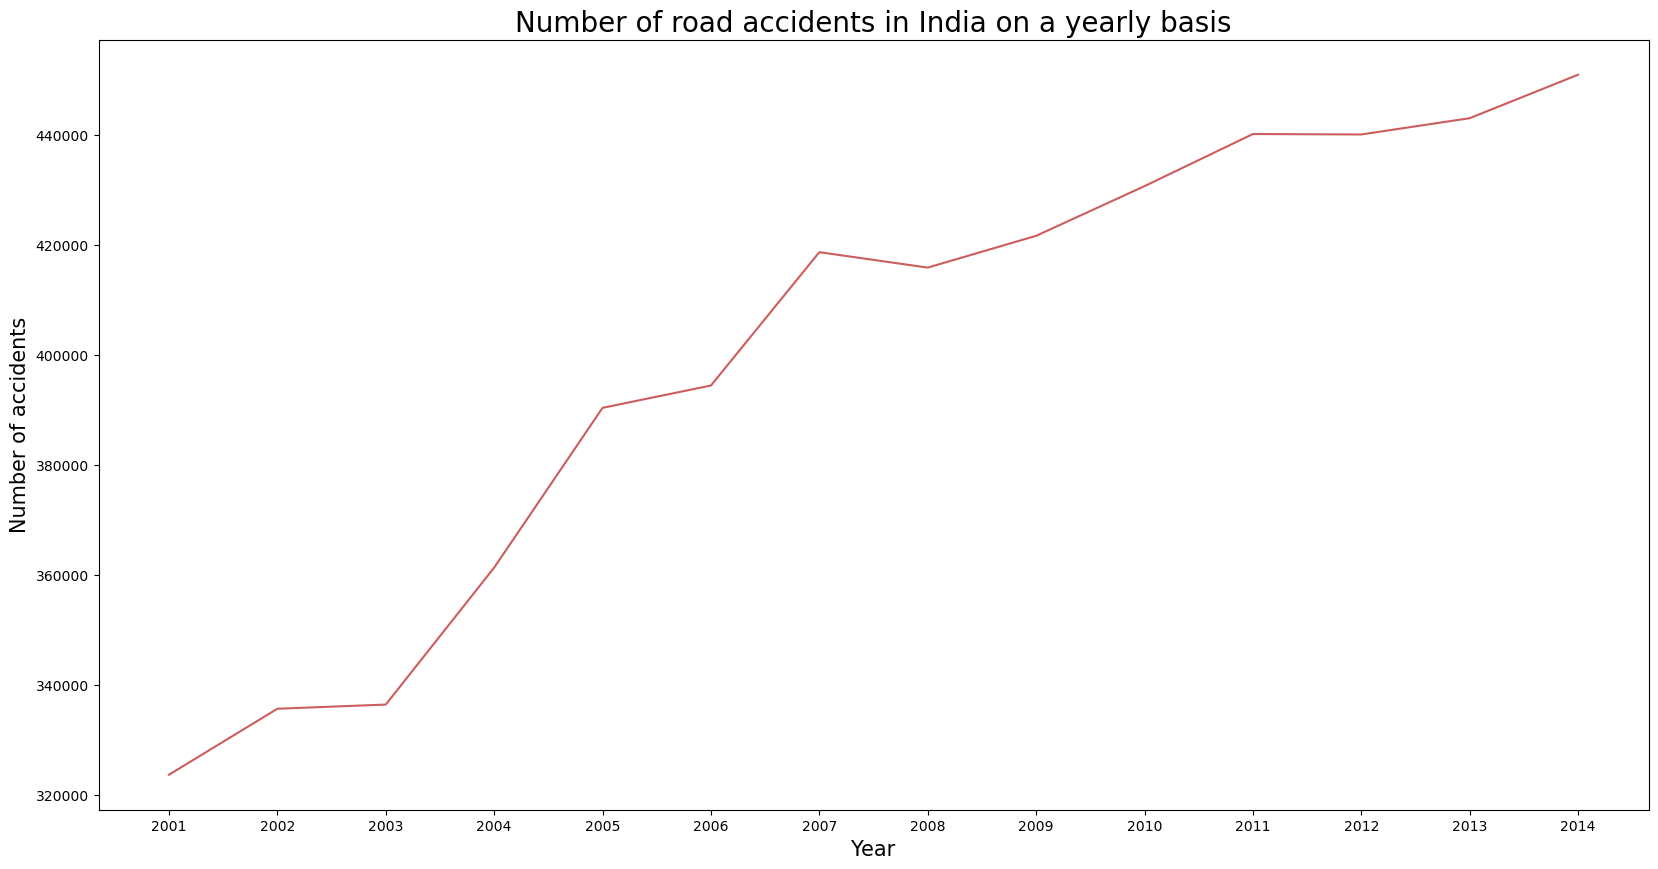

In [30]:
plt.figure(figsize=(20,10))

plt.plot(df_year['YEAR'],df_year['Total'], color='indianred')
plt.title('Number of road accidents in India on a yearly basis',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of accidents',size=15)
plt.xticks(np.arange(2001,2015,1),size=10)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
x_matrix=df_year['YEAR'].values.reshape(-1,1)
y=df_year['Total'].values

In [33]:
reg=LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [34]:
reg.intercept_

-19883660.67032967

In [35]:
reg.coef_

array([10104.04395604])

In [36]:
regression=[]
a=np.arange(2015,2025)
for year in a:
    year=np.array([year])
    year=year.reshape(1,-1)
    regression.append(reg.predict(year))

In [37]:
df_predicted=pd.DataFrame(regression)

In [38]:
df_predicted=df_predicted.rename(columns={0:'Total'})

In [39]:
df_predicted.reset_index(drop=True,inplace=True)

In [40]:
years=np.arange(2015,2025,1)

In [41]:
df_temp=pd.DataFrame(years)
df_temp

,0
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021
7,2022
8,2023
9,2024


In [42]:
df_predicted['Year']=df_temp

In [43]:
df_predicted=df_predicted[['Year','Total']]

In [44]:
df_predicted['Total']=df_predicted['Total'].values.round(0)
df_predicted.index=df_predicted.index+1
df_predicted

,Year,Total
1,2015,475988.0
2,2016,486092.0
3,2017,496196.0
4,2018,506300.0
5,2019,516404.0
6,2020,526508.0
7,2021,536612.0
8,2022,546716.0
9,2023,556820.0
10,2024,566924.0


In [45]:
df_location=pd.read_csv(r"C:\Users\snega\Desktop\python\Road accident\No_of_Road_Acc_acco_to_clf_of_age_of_Driver_2014_2016.csv")

In [46]:
df_location.head()

,S. No.,State/ UT,0-14,15-24,25-64,64 above,Age Less than 18 years - Fatal - 2016,Age Less than 18 years - Total - 2016,Age 18-25 - Fatal - 2016,Age 18-25 - Total - 2016,Age 25-35 - Fatal - 2016,Age 25-35 - Total - 2016,Age 35-45 - Fatal - 2016,Age 35-45 - Total - 2016,Age 45-60 - Fatal - 2016,Age 45-60 - Total - 2016,Age 60 and Above - Fatal - 2016,Age 60 and Above - Total - 2016,Age Age not known - Fatal - 2016,Age Age not known - Total - 2016
0,1,Andhra Pradesh,136,1812,4621,496,91,436,1682,5751,2148,7034,2316,6641,1057,3245,150,416,407,1365
1,2,Arunachal Pradesh,0,30,16,0,11,32,22,71,21,47,19,35,14,35,0,0,16,29
2,3,Assam,0,252,237,0,84,269,765,2774,796,2188,486,1426,183,439,131,339,0,0
3,4,Bihar,70,561,698,108,557,1144,1244,2318,941,1807,724,1281,391,740,65,129,503,803
4,5,Chhattisgarh,0,432,1113,0,81,300,778,3120,1127,4209,712,2913,383,1522,53,268,393,1248


In [47]:
df_location_updated=df_location.iloc[:,47:]
df_location_updated.head()

""
0
1
2
3
4


In [48]:
df_month=pd.read_csv(r"C:\Users\snega\Desktop\python\Road accident\only_road_accidents_data_month2.csv")

In [49]:
df_month.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [50]:
i=0
for year in df_month['YEAR']:
    if year==2014:
        i+=1
    else:
        df_month=df_month.drop(i)
        i+=1

In [51]:
df_month.reset_index(drop=True)

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2014,25,13,19,19,18,15,15,16,15,23,18,22,218
1,Andhra Pradesh,2014,3809,3657,3641,3582,3986,3664,3167,3587,3225,3410,3346,4158,43232
2,Arunachal Pradesh,2014,28,10,10,21,9,12,13,14,14,15,22,17,185
3,Assam,2014,658,615,689,612,566,531,573,528,460,670,638,604,7144
4,Bihar,2014,777,742,852,714,985,1002,757,662,685,720,829,806,9531
5,Chandigarh,2014,35,22,31,40,32,25,22,32,38,31,28,30,366
6,Chhattisgarh,2014,1167,1110,1000,1020,1149,1051,934,877,910,1005,973,944,12140
7,D&N Haveli,2014,6,7,7,10,9,4,8,7,7,8,8,6,87
8,Daman & Diu,2014,6,4,3,3,2,2,0,5,1,5,2,6,39
9,Delhi Ut,2014,643,698,801,632,661,658,624,744,742,687,720,700,8310


In [52]:
df_month_top=df_month[df_month['TOTAL']>20000]
df_month_top

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
27,Andhra Pradesh,2014,3809,3657,3641,3582,3986,3664,3167,3587,3225,3410,3346,4158,43232
167,Gujarat,2014,2023,1978,2039,1846,2127,1988,1673,1633,1506,1817,1678,1844,22152
237,Karnataka,2014,3915,3649,3805,3577,4053,3772,3421,3428,3254,3517,3442,3861,43694
251,Kerala,2014,3332,2909,3005,2785,3162,2805,2834,2913,2911,2911,2963,3342,35872
279,Madhya Pradesh,2014,3375,3154,3470,3345,4107,3637,3104,2951,2946,3261,3288,3060,39698
293,Maharashtra,2014,3978,3714,3920,3847,4258,3784,3546,3450,3298,3291,3478,3818,44382
405,Rajasthan,2014,2143,1951,2130,2053,2484,2213,1976,1888,1839,2035,2104,1823,24639
433,Tamil Nadu,2014,5658,5293,5824,5303,5711,5915,5719,5936,5777,5516,5036,5562,67250
461,Uttar Pradesh,2014,2550,2311,2217,2067,2265,2209,2086,2017,1824,2023,2170,2325,26064


Text(0.5, 1.0, 'States with highest accidents in 2014')

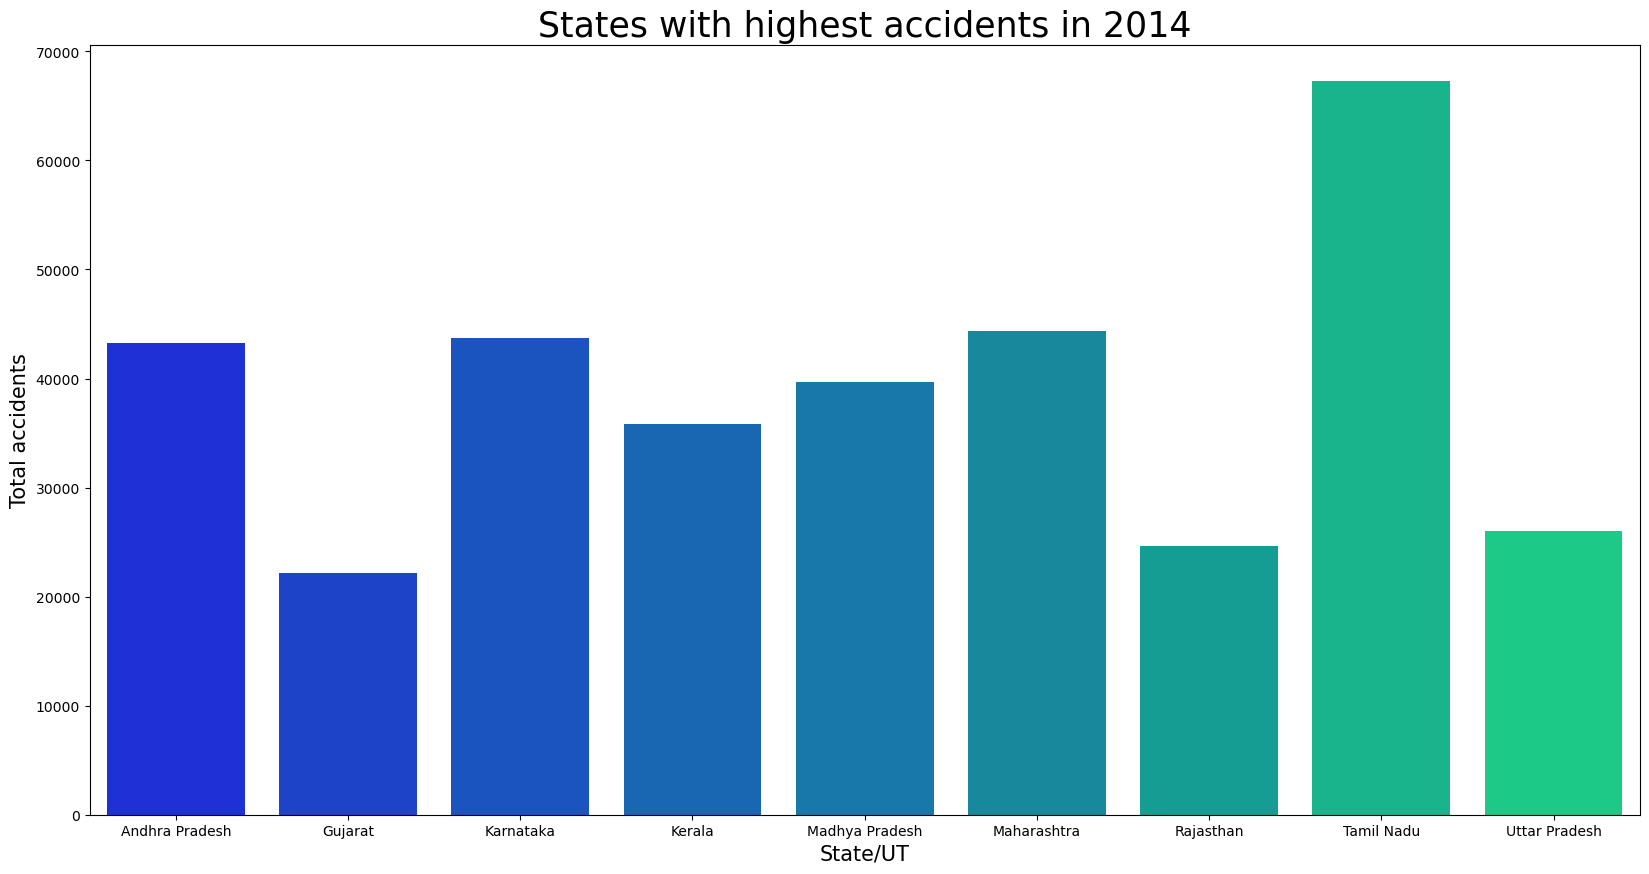

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x='STATE/UT',y='TOTAL',data=df_month_top,palette='winter')
plt.xlabel('State/UT',size=15)
plt.ylabel('Total accidents',size=15)
plt.title('States with highest accidents in 2014',size=25)

As we see, like each year, Tamil Nadu records highest number of road accidents by a large margin.

In [54]:
df_tamil_nadu=df_month.loc[df_month['STATE/UT'].isin(['Tamil Nadu'])]
df_karnataka=df_month.loc[df_month['STATE/UT'].isin(['Karnataka'])]
df_maharashtra=df_month.loc[df_month['STATE/UT'].isin(['Maharashtra'])]
df_delhi=df_month.loc[df_month['STATE/UT'].isin(['Delhi Ut'])]

In [55]:
df_tamil_nadu

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
433,Tamil Nadu,2014,5658,5293,5824,5303,5711,5915,5719,5936,5777,5516,5036,5562,67250


In [56]:
df_delhi

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
139,Delhi Ut,2014,643,698,801,632,661,658,624,744,742,687,720,700,8310


In [57]:
df_karnataka

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
237,Karnataka,2014,3915,3649,3805,3577,4053,3772,3421,3428,3254,3517,3442,3861,43694


In [58]:
df_maharashtra

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
293,Maharashtra,2014,3978,3714,3920,3847,4258,3784,3546,3450,3298,3291,3478,3818,44382


([<matplotlib.axis.XTick at 0x1fb8b36a710>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

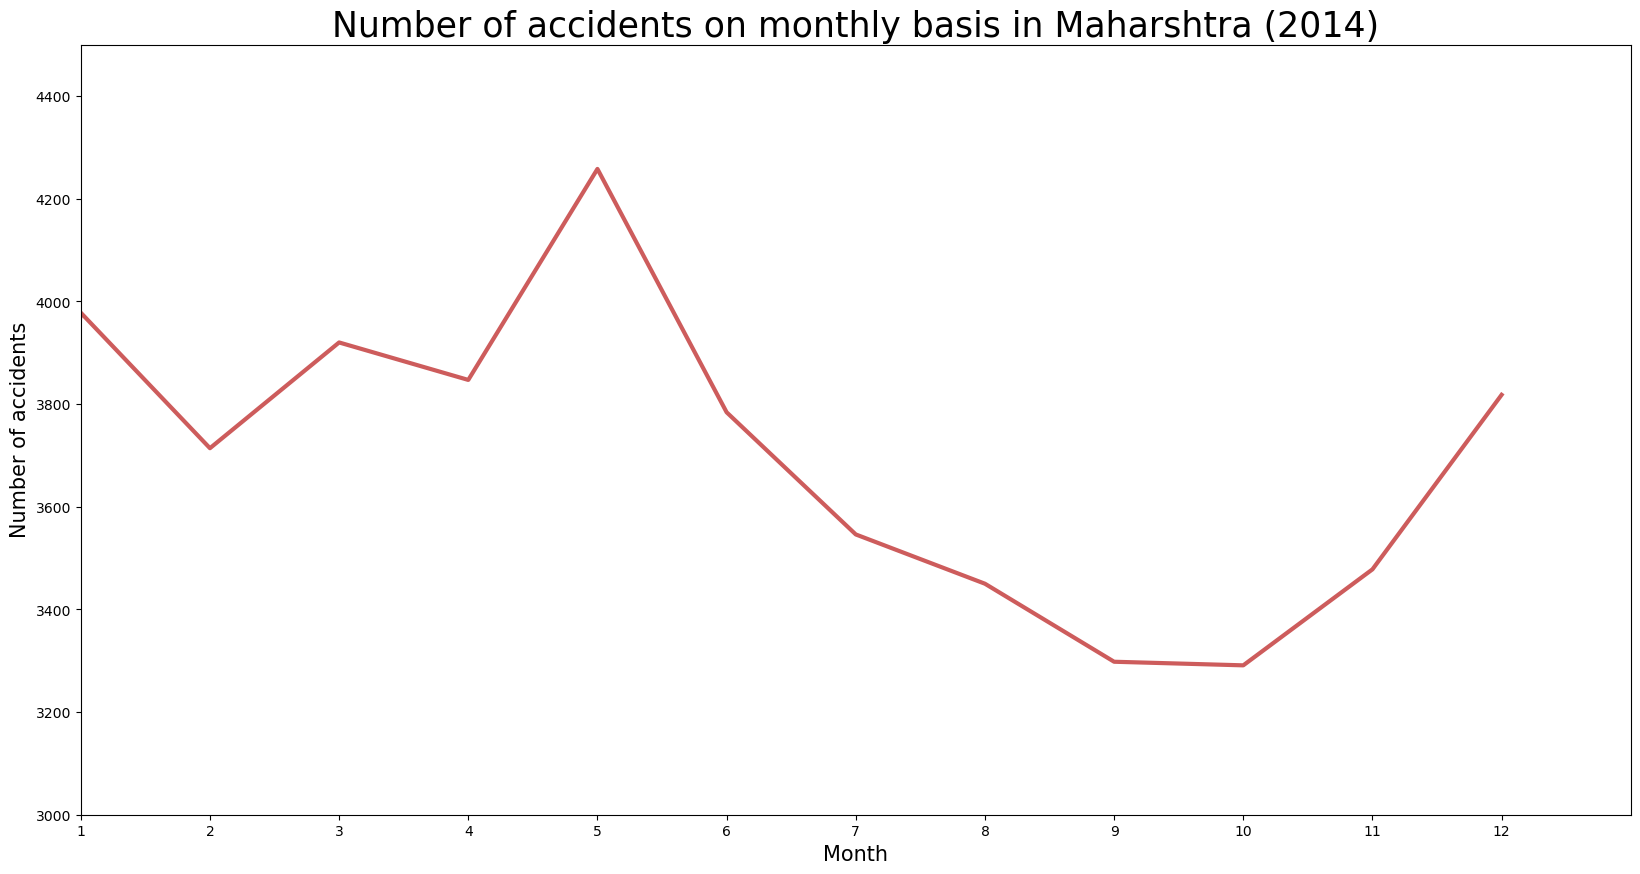

In [59]:
plt.figure(figsize=(20,10))
val=df_maharashtra.iloc[:,1:14].values
plt.plot(val[0],color='indianred',linewidth=3)
plt.xlim(1,13)
plt.ylim(3000,4500)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Maharshtra (2014)',size=25)
plt.xticks(np.arange(1,13))

([<matplotlib.axis.XTick at 0x1fb8b3d9150>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

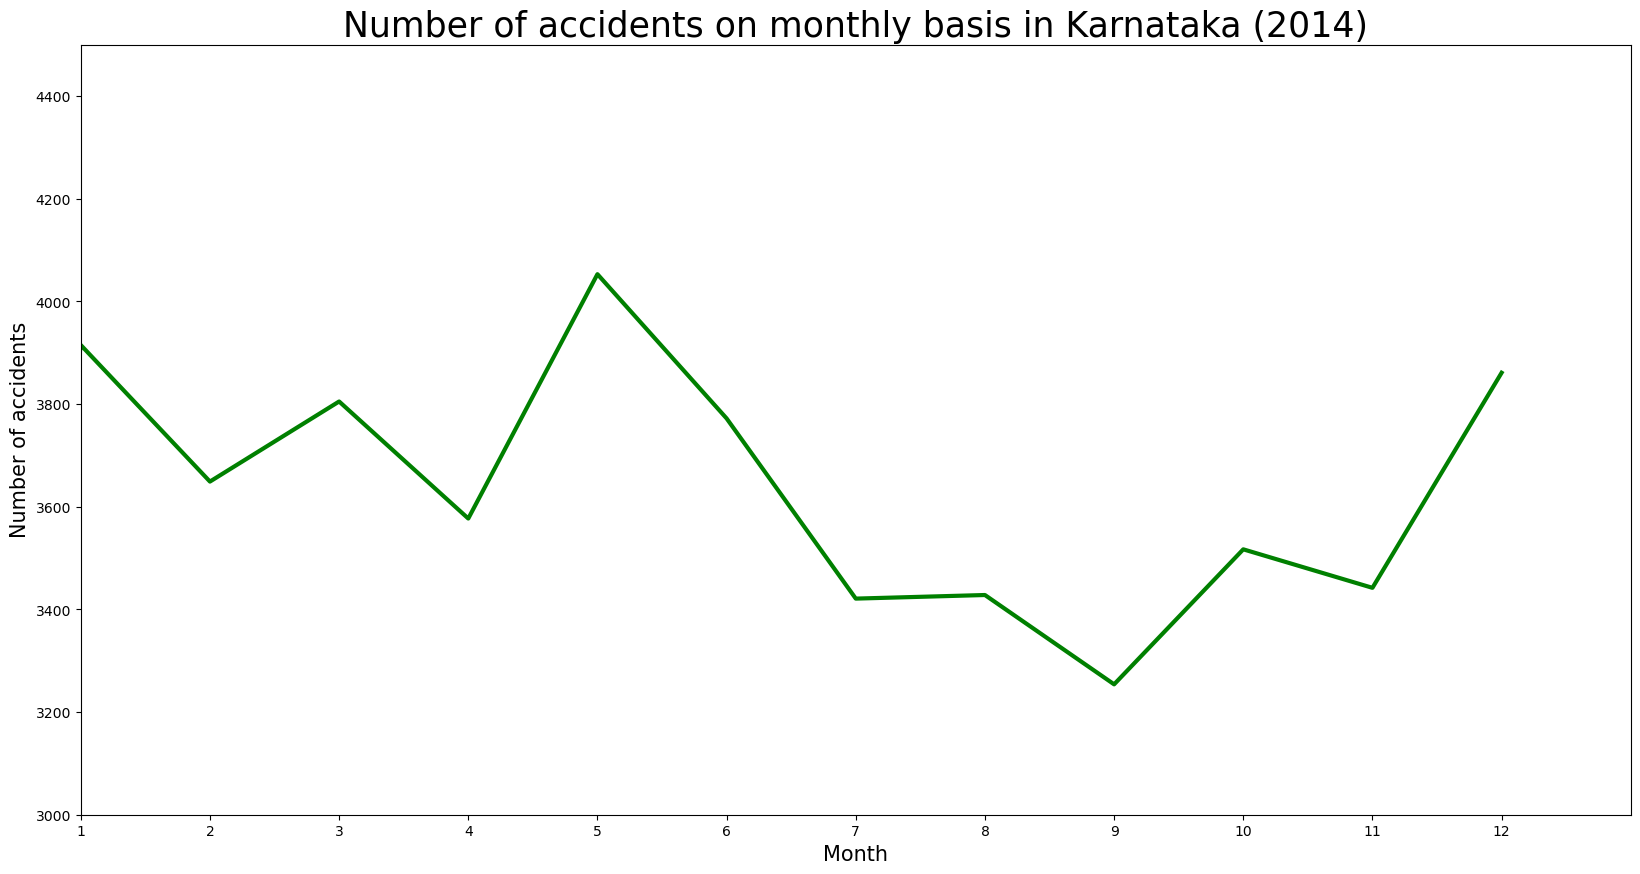

In [60]:
plt.figure(figsize=(20,10))
val=df_karnataka.iloc[:,1:14].values
plt.plot(val[0],color='green',linewidth=3)
plt.xlim(1,13)
plt.ylim(3000,4500)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Karnataka (2014)',size=25)
plt.xticks(np.arange(1,13))

In the states of Karnataka and Maharashtra, the accidents peak in the period of April to June. In the rainy seasons starting from first week of June, the accidents reduce. It could mean that drivers take greater precaution during the rains than the dry season.

Text(0.5, 1.0, 'Number of accidents on monthly basis in Tamil Nadu (2014)')

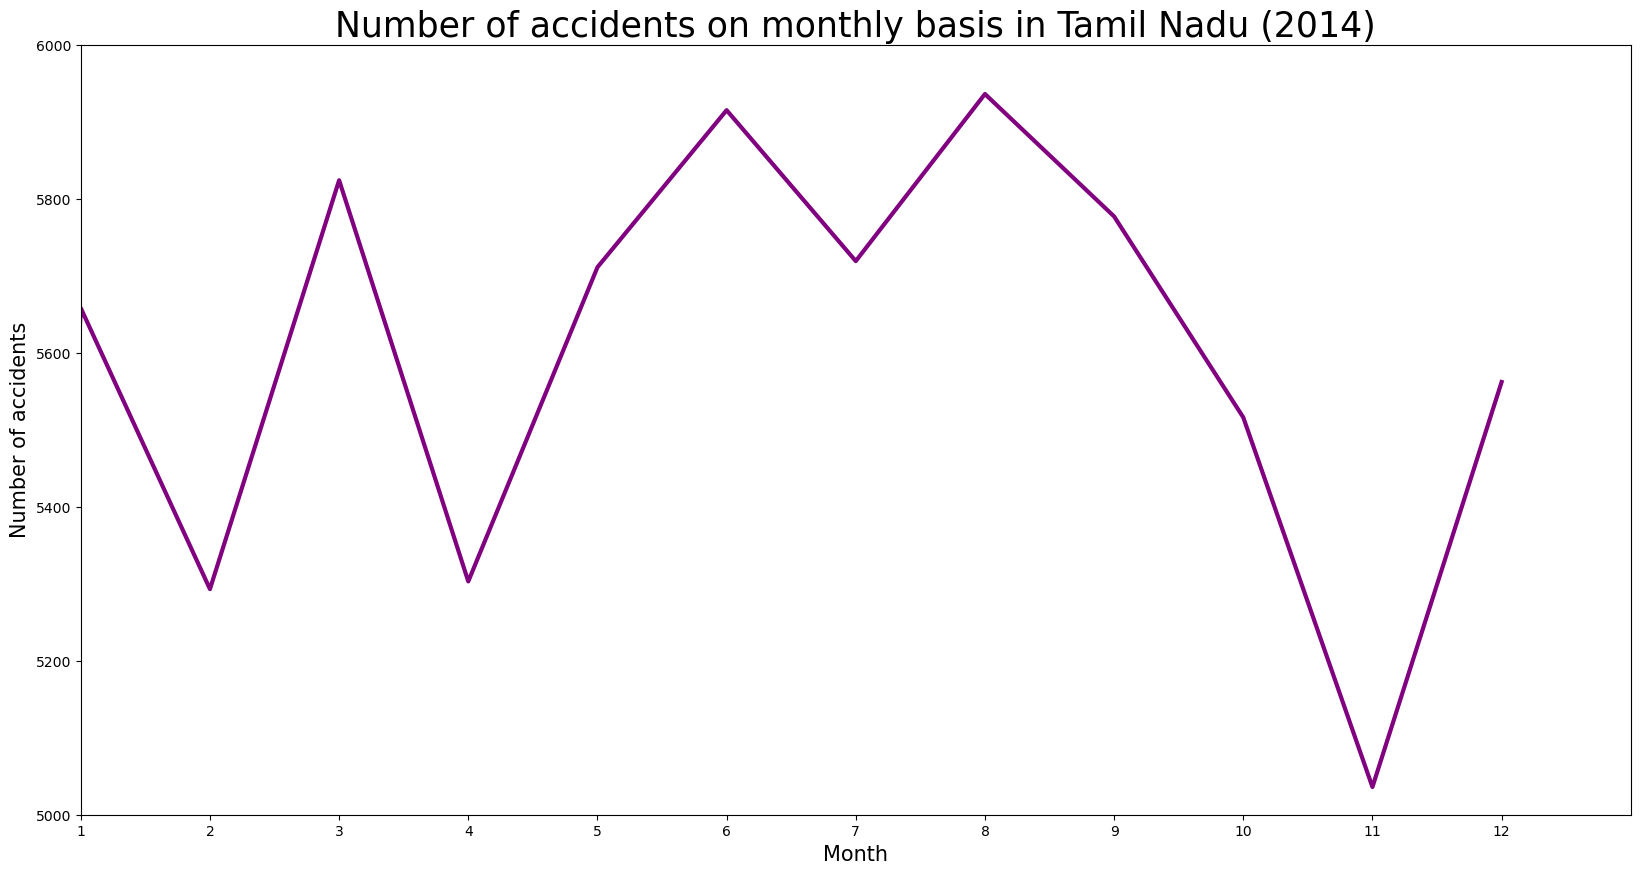

In [61]:
plt.figure(figsize=(20,10))
val=df_tamil_nadu.iloc[:,1:14].values
plt.plot(val[0],color='purple',linewidth=3)
plt.xlim(1,13)
plt.ylim(5000,6000)
plt.xticks(np.arange(1,13))
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Tamil Nadu (2014)',size=25)

([<matplotlib.axis.XTick at 0x1fb8b4e1390>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

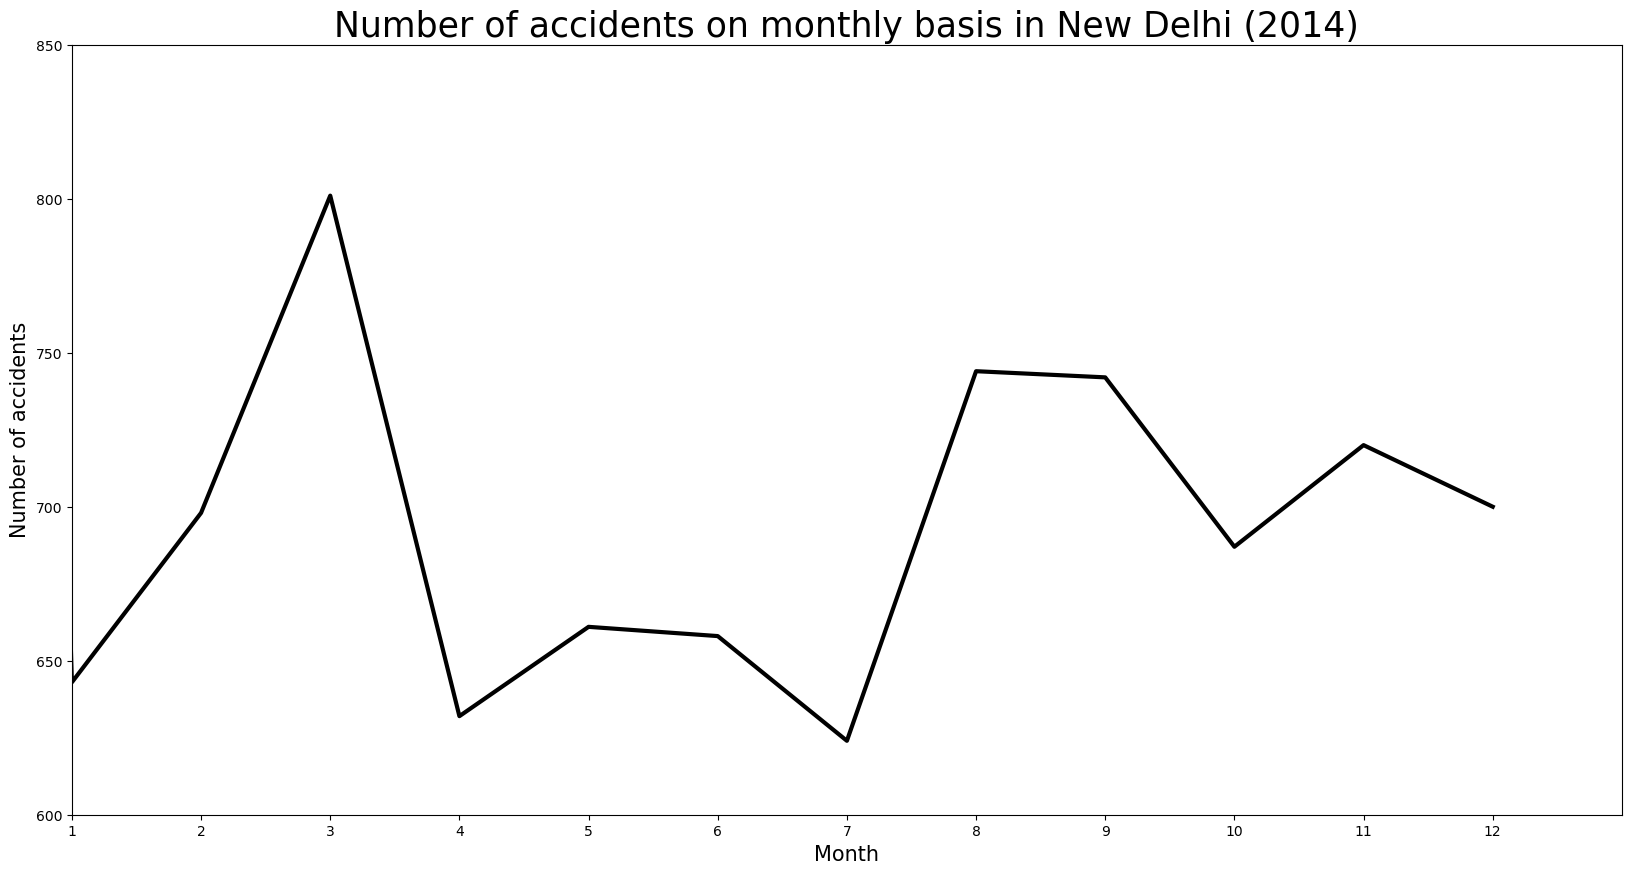

In [62]:
plt.figure(figsize=(20,10))
val=df_delhi.iloc[:,1:14].values
plt.plot(val[0],color='black',linewidth=3)
plt.xlim(1,13)
plt.ylim(600,850)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in New Delhi (2014)',size=25)
plt.xticks(np.arange(1,13))

In New Delhi, accidents seem to peak early in the year. As expected, the accidents during the rainy season from June to July are low. However, a sharp increase does take place in August.

In [63]:
df_hedu=pd.read_csv(r"C:\Users\snega\Desktop\python\Road accident\Accidents_Classified_Acc_To_EduQual_Of_Drivers_9-10_standard-09-16.csv")
df_hedu

,States/UTs,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,9882.0,8040.0,13550.0,8657.0,17170.0,7941.0,6333.0,7111.0
1,Arunachal Pradesh,107.0,90.0,113.0,76.0,131.0,61.0,104.0,69.0
2,Assam,1704.0,NaN,NaN,NaN,2554.0,2547.0,2498.0,2936.0
3,Bihar,3273.0,5200.0,4136.0,3938.0,3761.0,3643.0,2981.0,2400.0
4,Chhattisgarh,6017.0,5994.0,6197.0,7052.0,7071.0,5041.0,5134.0,3626.0
5,Goa,1428.0,1593.0,1537.0,1512.0,1429.0,1287.0,1341.0,2083.0
6,Gujarat,13008.0,12319.0,9692.0,7864.0,9478.0,8835.0,7729.0,8086.0
7,Haryana,2996.0,2805.0,2809.0,2588.0,2770.0,2879.0,3065.0,2717.0
8,Himachal Pradesh,964.0,1087.0,462.0,626.0,856.0,798.0,627.0,2180.0
9,Jammu & Kashmir,1422.0,1305.0,780.0,618.0,1603.0,1723.0,1722.0,780.0


In [64]:
df_ledu=pd.read_csv(r"C:\Users\snega\Desktop\python\Road accident\Accidents_Acc_EduQual_Drivers_above_10_Standard_09-16.csv")

In [65]:
df_ledu.head()

,States/UTs,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,9826.0,7849.0,20150.0,8144.0,12902.0,10485.0,13022.0,10540.0
1,Arunachal Pradesh,96.0,89.0,86.0,87.0,84.0,83.0,88.0,71.0
2,Assam,2070.0,NaN,NaN,NaN,2075.0,2629.0,2240.0,1708.0
3,Bihar,2447.0,3084.0,3810.0,3722.0,3737.0,3826.0,3940.0,2061.0
4,Chhattisgarh,3605.0,4569.0,4934.0,3571.0,3660.0,4628.0,6686.0,6827.0


In [66]:
df_hedu_updated=df_hedu.loc[:,['States/UTs','2016']]

In [67]:
df_hedu_updated=df_hedu_updated.rename(columns={'2016':'10th pass'})

In [68]:
df_hedu_updated

,States/UTs,10th pass
0,Andhra Pradesh,7111.0
1,Arunachal Pradesh,69.0
2,Assam,2936.0
3,Bihar,2400.0
4,Chhattisgarh,3626.0
5,Goa,2083.0
6,Gujarat,8086.0
7,Haryana,2717.0
8,Himachal Pradesh,2180.0
9,Jammu & Kashmir,780.0


In [69]:
df_ledu_updated=df_ledu.loc[:,['2016']]

In [70]:
df_ledu_updated=df_ledu_updated.rename(columns={'2016': '10th Fail'})
df_ledu_updated

,10th Fail
0,10540.0
1,71.0
2,1708.0
3,2061.0
4,6827.0
5,1528.0
6,7896.0
7,2771.0
8,487.0
9,611.0


In [71]:
df_education=df_hedu_updated.copy()

In [72]:
df_education['10th fail']=df_ledu_updated

In [73]:
df_education.dropna(axis=0,inplace=True)
df_education.drop(36,inplace=True)

Text(0.5, 0, 'State/UT')

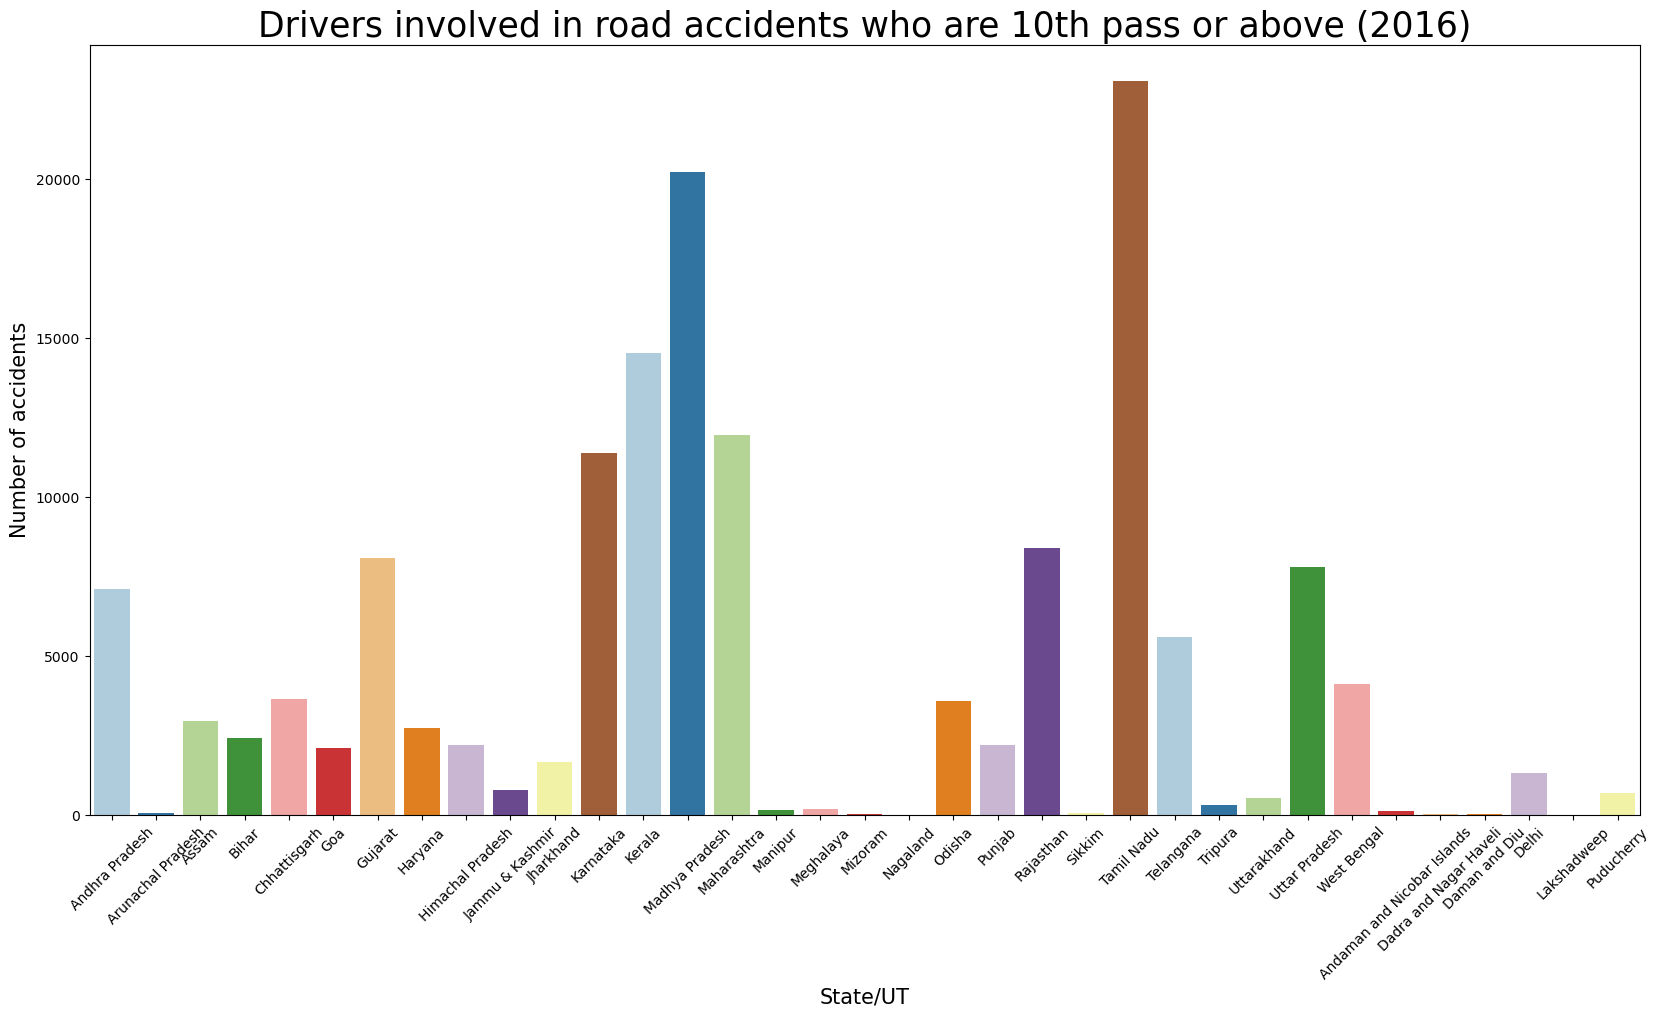

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_education['States/UTs'],y=df_education['10th pass'],palette='Paired')
plt.xticks(rotation=45,size=10)
plt.title('Drivers involved in road accidents who are 10th pass or above (2016)',size=25)
plt.ylabel('Number of accidents',size=15)
plt.xlabel('State/UT',size=15)

Text(0.5, 0, 'State/UT')

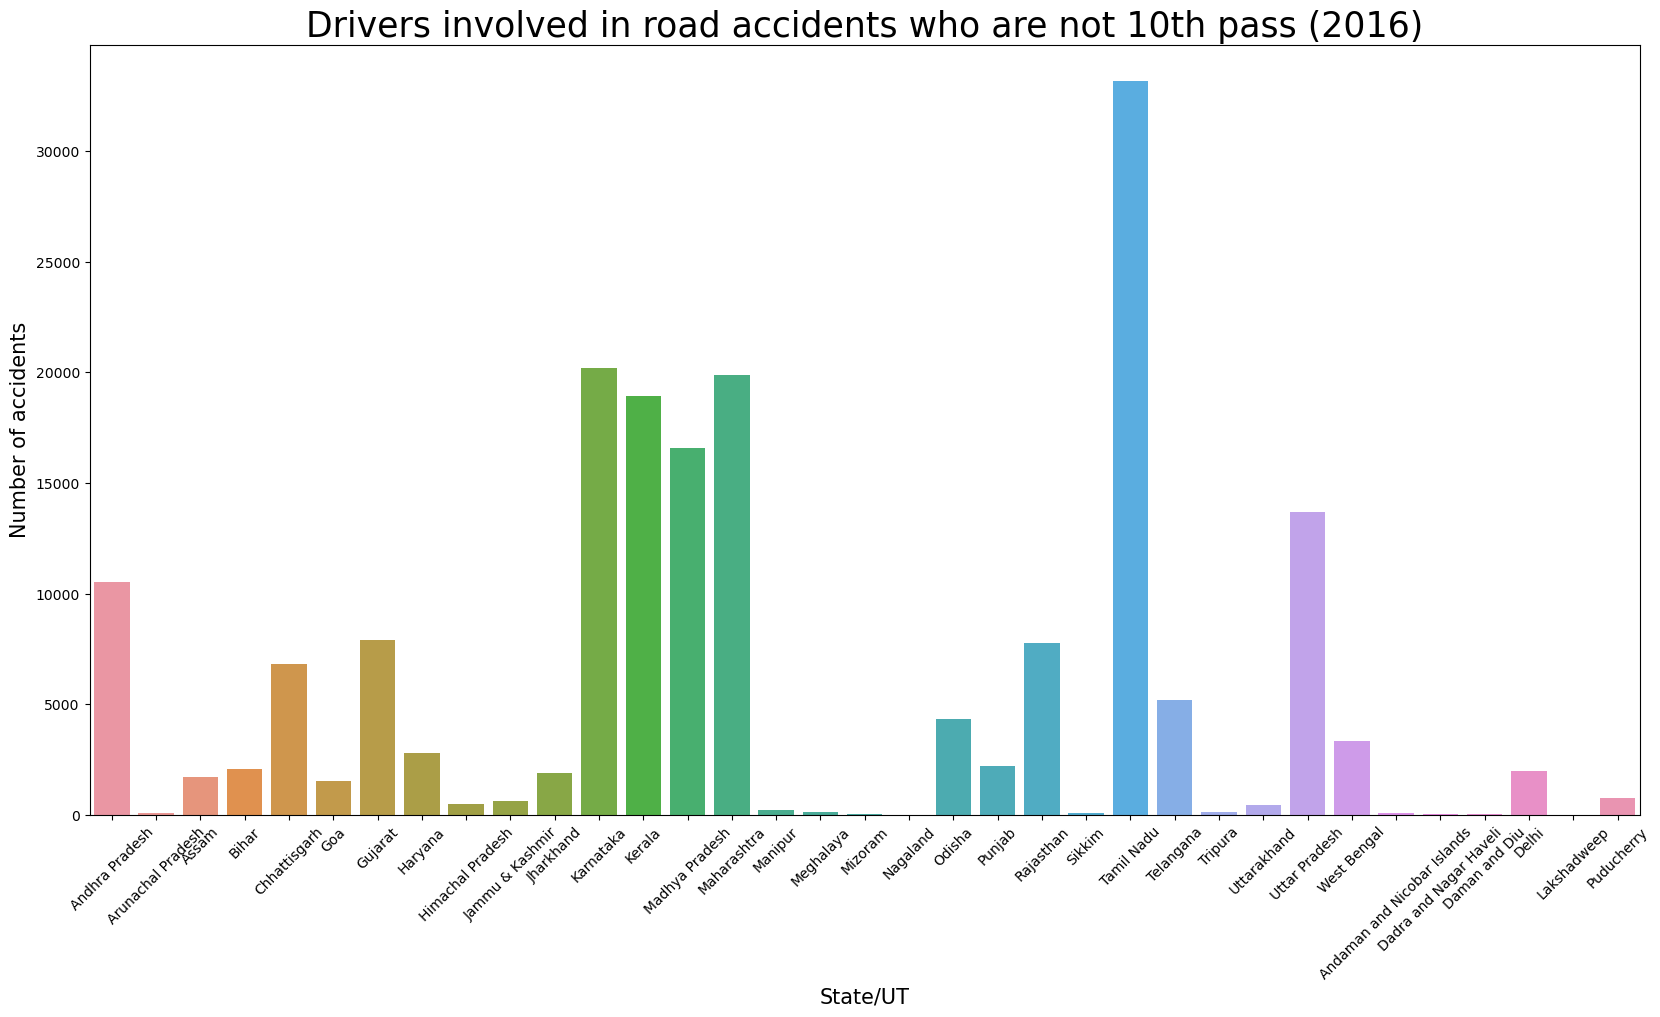

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_education['States/UTs'],y=df_education['10th fail'])
plt.xticks(rotation=45,size=10)
plt.title('Drivers involved in road accidents who are not 10th pass (2016)',size=25)
plt.ylabel('Number of accidents',size=15)
plt.xlabel('State/UT',size=15)

From the above visualisations, it is observed that education plays little role in driver accidents. In Tamil Nadu, under both 10th pass and 10th fail criteria, the accidents are higher. The case is similar for most of the states. However, the cases in the North East states is extremely low even with limited road development due to it's challenging topological conditions.

In [76]:
df_education['Total accidents']=df_education['10th pass']+df_education['10th fail']
df_education.head()

,States/UTs,10th pass,10th fail,Total accidents
0,Andhra Pradesh,7111.0,10540.0,17651.0
1,Arunachal Pradesh,69.0,71.0,140.0
2,Assam,2936.0,1708.0,4644.0
3,Bihar,2400.0,2061.0,4461.0
4,Chhattisgarh,3626.0,6827.0,10453.0


In [77]:
df_education=df_education.sort_values(by='Total accidents',ascending=False)

In [78]:
df_age=pd.read_csv(r"C:\Users\snega\Desktop\python\Road accident\No_of_Road_Acc_acco_to_clf_of_age_of_Driver_2014_2016.csv")
df_age.head()

,S. No.,State/ UT,0-14,15-24,25-64,64 above,Age Less than 18 years - Fatal - 2016,Age Less than 18 years - Total - 2016,Age 18-25 - Fatal - 2016,Age 18-25 - Total - 2016,Age 25-35 - Fatal - 2016,Age 25-35 - Total - 2016,Age 35-45 - Fatal - 2016,Age 35-45 - Total - 2016,Age 45-60 - Fatal - 2016,Age 45-60 - Total - 2016,Age 60 and Above - Fatal - 2016,Age 60 and Above - Total - 2016,Age Age not known - Fatal - 2016,Age Age not known - Total - 2016
0,1,Andhra Pradesh,136,1812,4621,496,91,436,1682,5751,2148,7034,2316,6641,1057,3245,150,416,407,1365
1,2,Arunachal Pradesh,0,30,16,0,11,32,22,71,21,47,19,35,14,35,0,0,16,29
2,3,Assam,0,252,237,0,84,269,765,2774,796,2188,486,1426,183,439,131,339,0,0
3,4,Bihar,70,561,698,108,557,1144,1244,2318,941,1807,724,1281,391,740,65,129,503,803
4,5,Chhattisgarh,0,432,1113,0,81,300,778,3120,1127,4209,712,2913,383,1522,53,268,393,1248


In [79]:
df_age_2014=df_age.iloc[:,0:6]
df_age_2014.drop('S. No.',axis=1,inplace=True)

In [80]:
#df_age_2014.drop(36,inplace=True)
df_age_2014.dropna(axis=1,inplace=True)

Text(0, 0.5, 'Number of accidents')

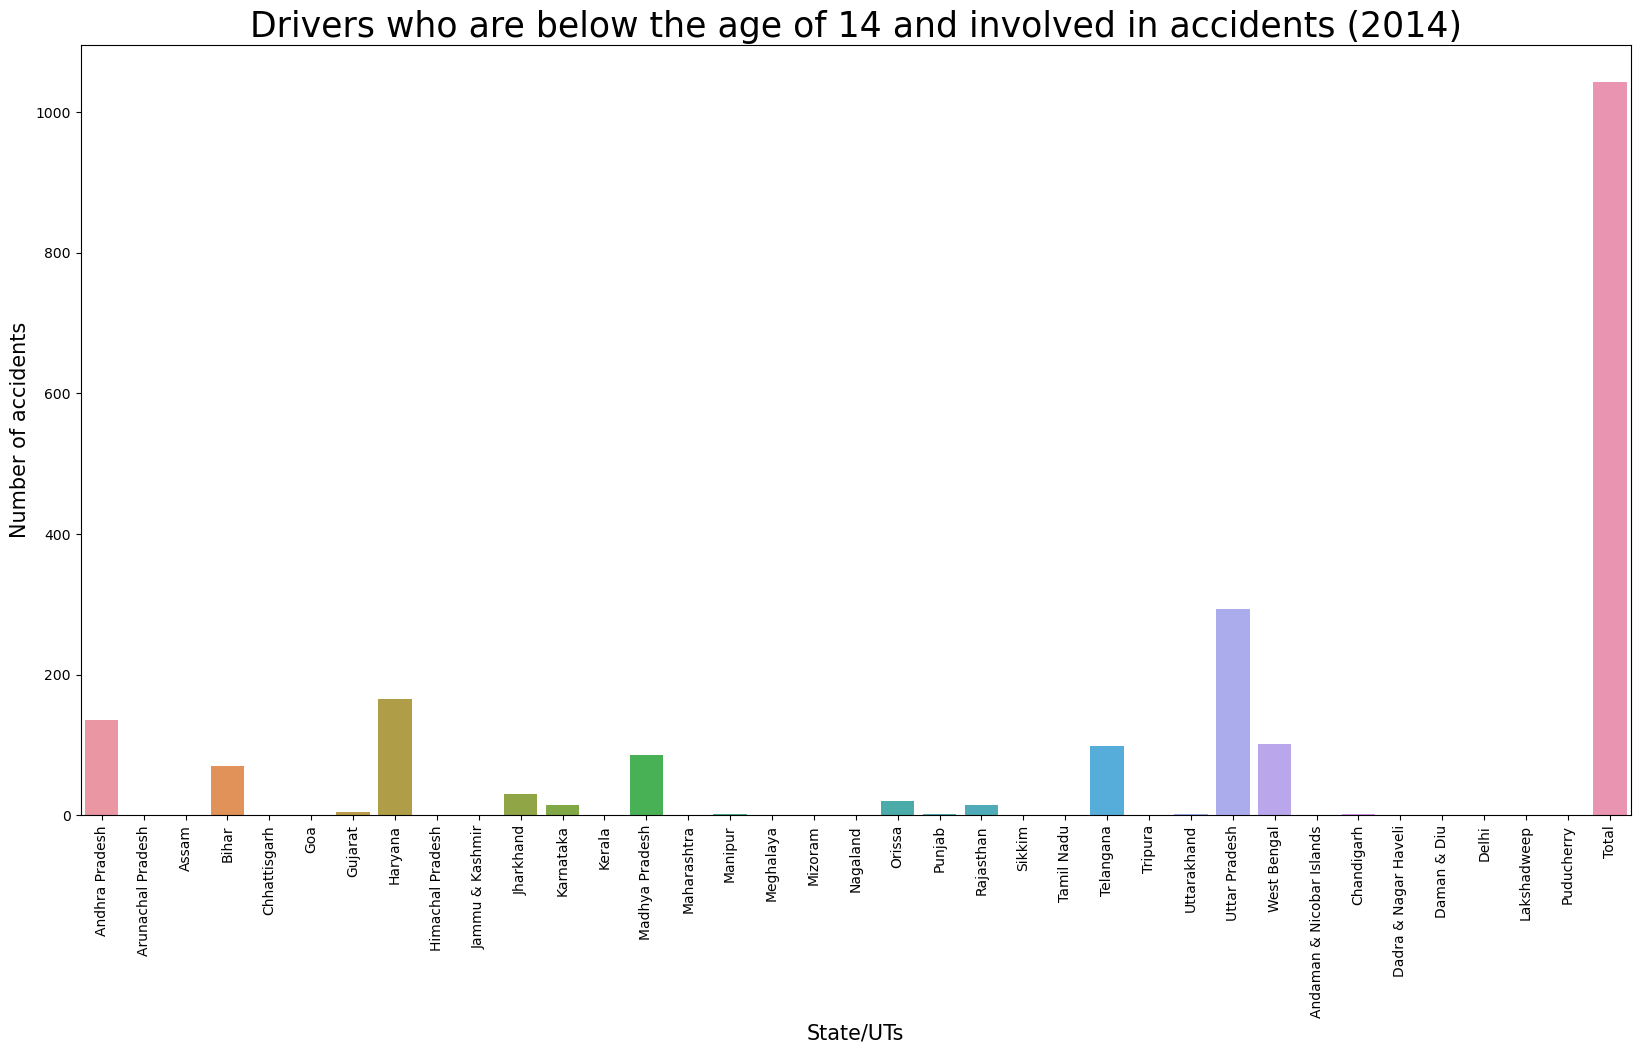

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='0-14',data=df_age_2014)
plt.xticks(rotation=90)
plt.title('Drivers who are below the age of 14 and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

From the above visualisation, the under age driving causing road accidents is extremely severe in Uttar Pradesh. Haryana,Telangana, West Bengal,Andhra Pradesh,Bihar,MP are also notable mentions. Under age driving punishments aren't enforced as strictly in these states as in other states.

Text(0, 0.5, 'Number of accidents')

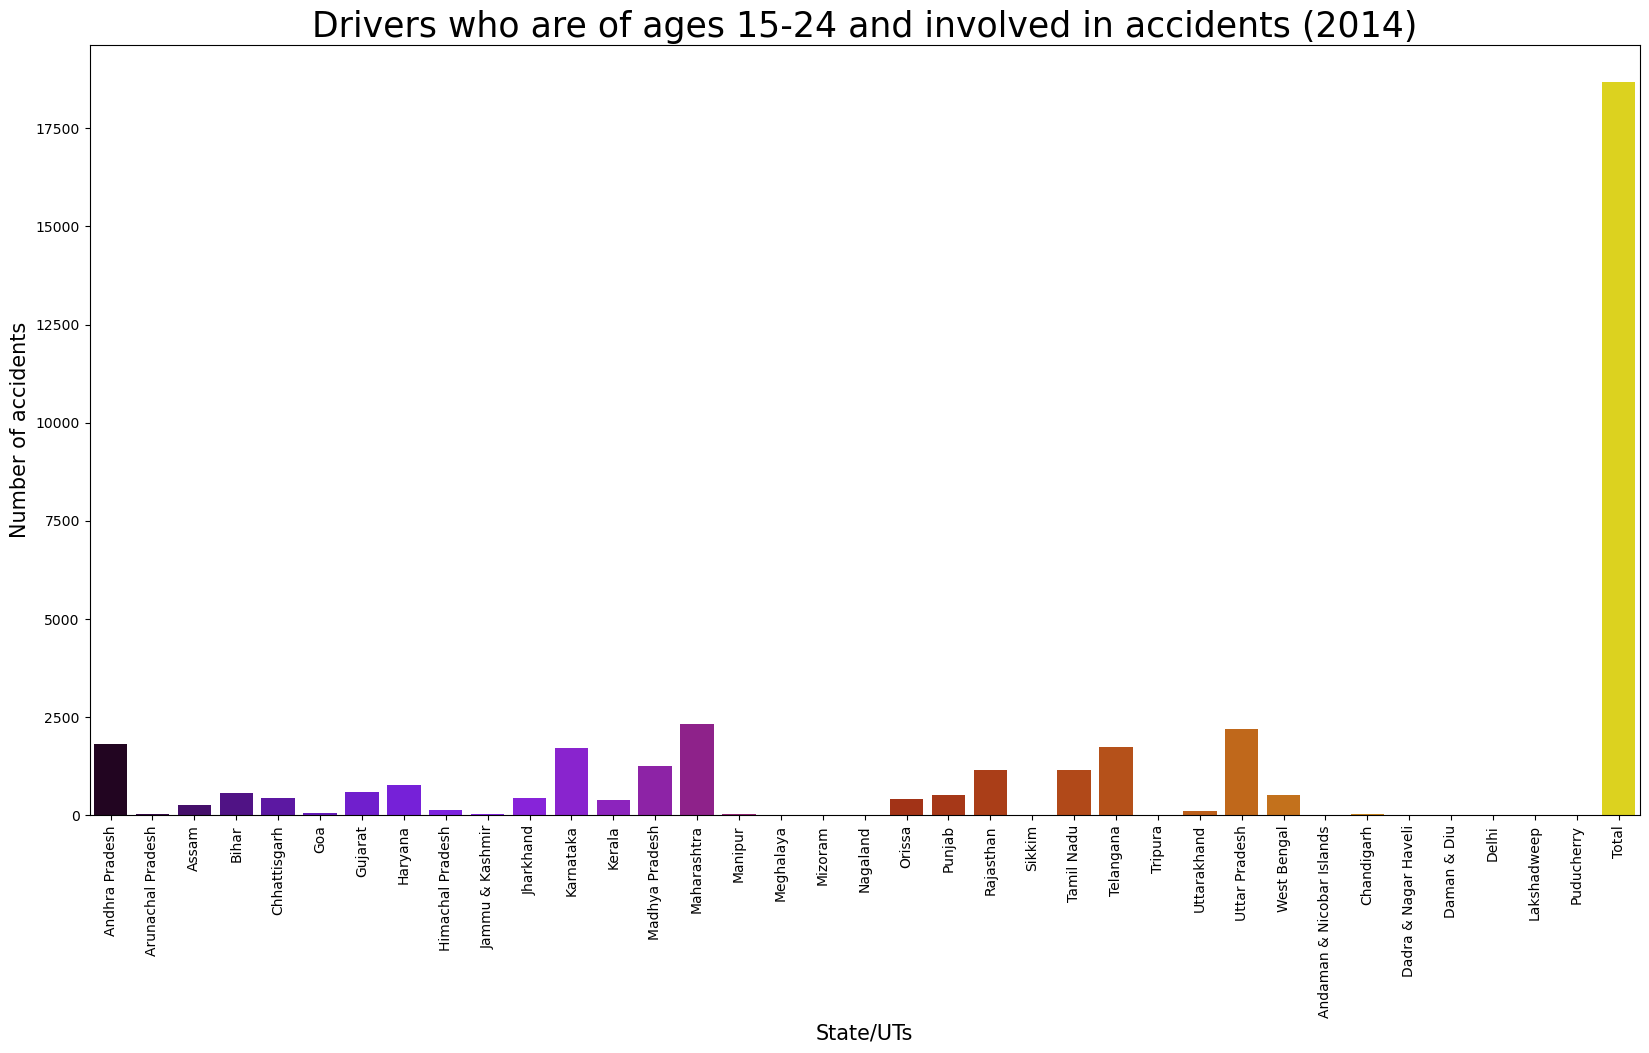

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='15-24',data=df_age_2014,palette='gnuplot')
plt.xticks(rotation=90)
plt.title('Drivers who are of ages 15-24 and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

Between the ages of 15-24, most of the accidents are from Maharashtra and UP. Telangana, Andhra Pradesh, Karnataka are also a notable mention. This age group generally comprises of school going senior students or college students who use 2 wheelers. Speeding is one of the major reasons for these accidents.

Text(0, 0.5, 'Number of accidents')

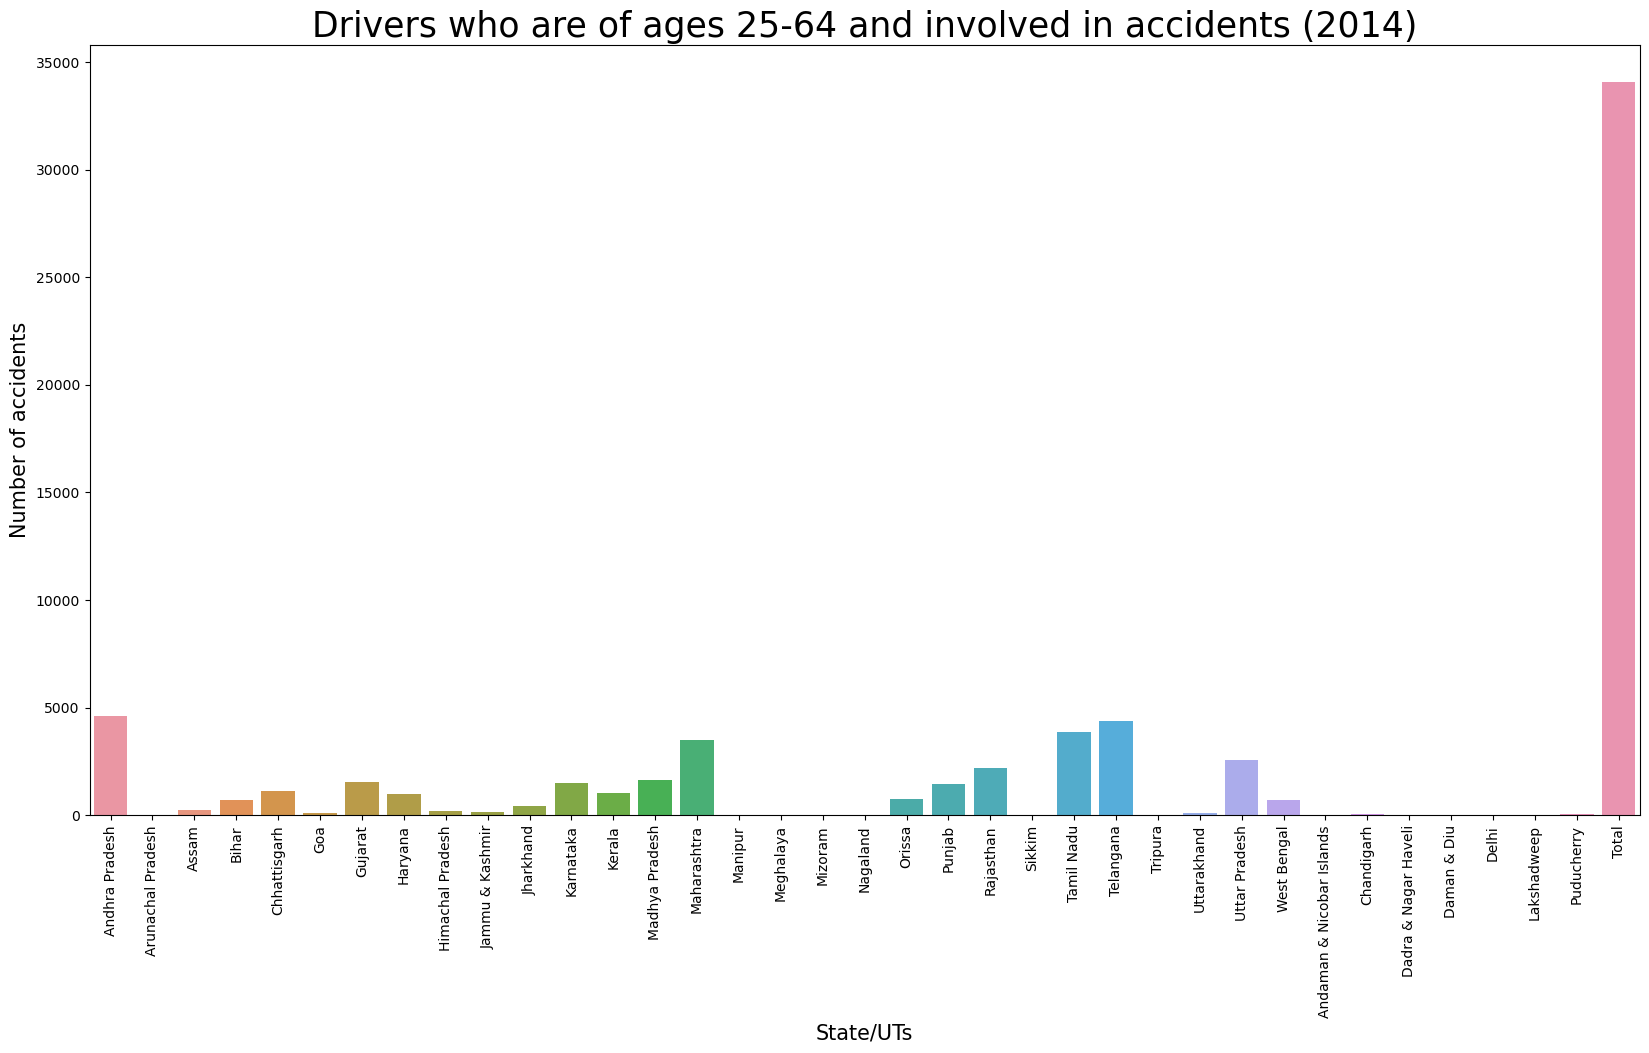

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='25-64',data=df_age_2014)
plt.xticks(rotation=90)
plt.title('Drivers who are of ages 25-64 and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

Amongst the middle aged and retiring aged people, Andhra Pradesh , Telangana, Tamil Nadu , Maharashtra have high cases of accidents.

Text(0, 0.5, 'Number of accidents')

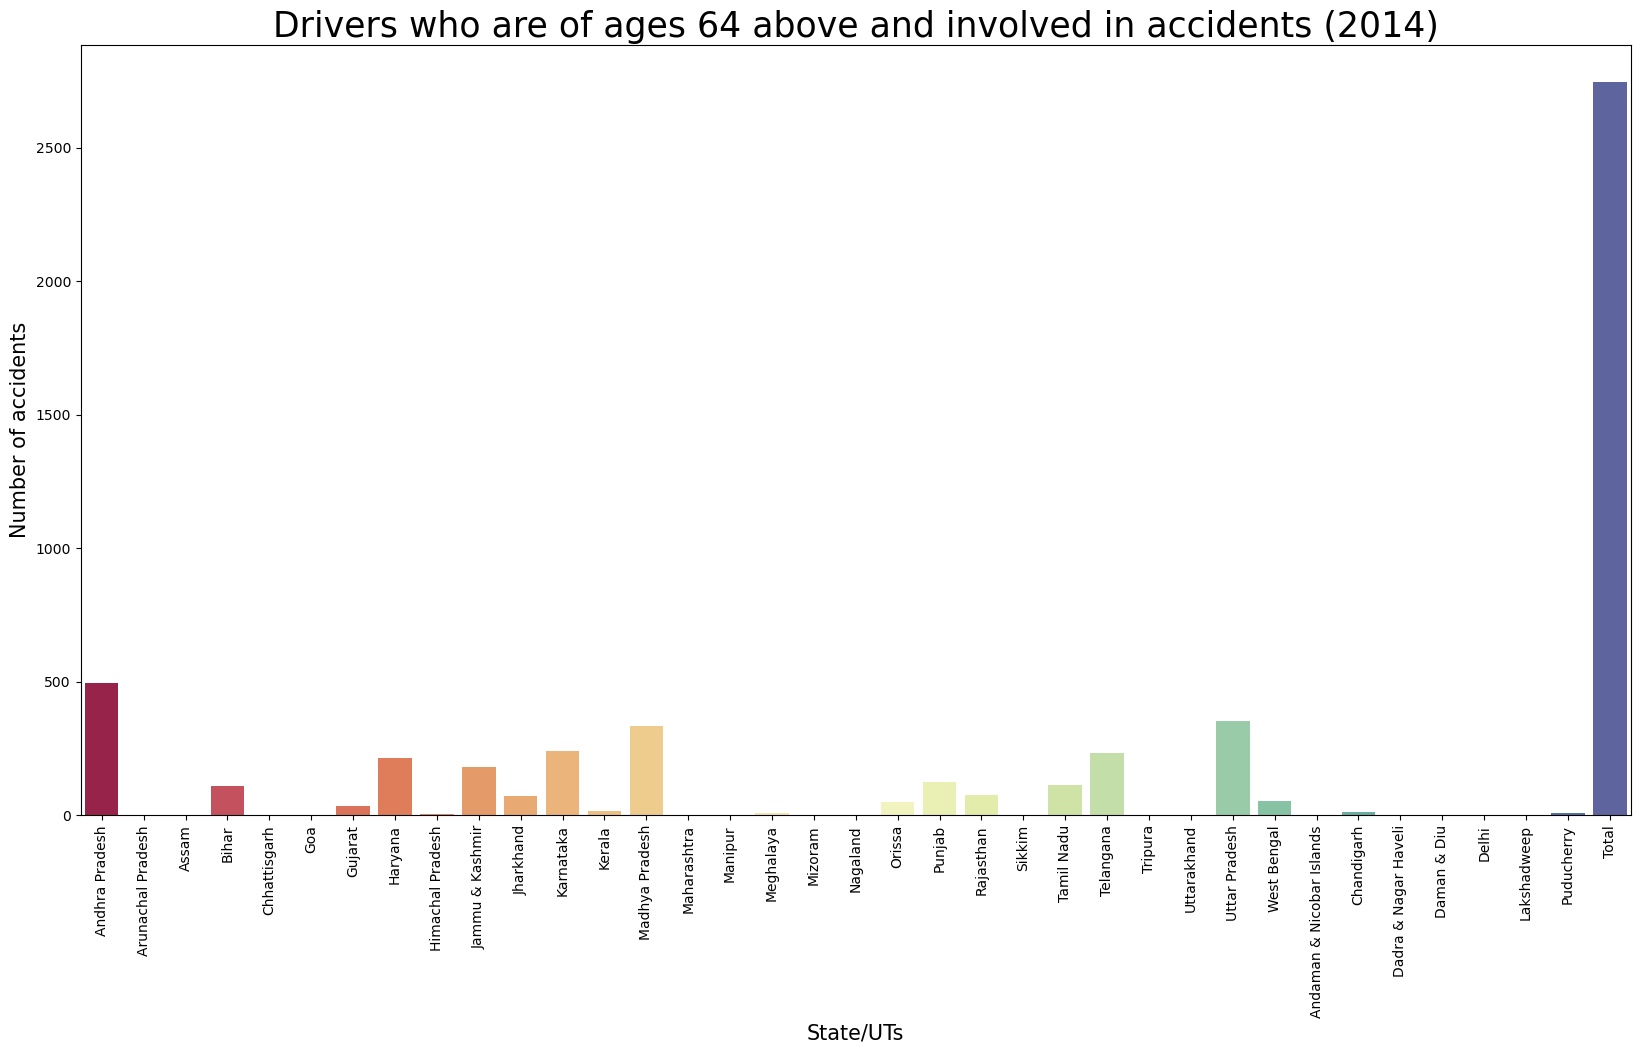

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='64 above',data=df_age_2014,palette='Spectral')
plt.xticks(rotation=90)
plt.title('Drivers who are of ages 64 above and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

Amongst the senior citizens aswell, Andhra Pradesh records the highest cases followed by MP and UP. States having strong public transport systems such as metros and buses show low accident rates for senior citizens since they prefer it over driving themselves.

In [85]:
df_Andhra=df_age_2014.iloc[0:1,:]

In [86]:
df_Andhra

,State/ UT,0-14,15-24,25-64,64 above
0,Andhra Pradesh,136,1812,4621,496


In [87]:
unstack_df=df_Andhra.unstack()

In [88]:
unstack_df.reset_index(drop=True,inplace=True)

In [89]:
list1=[]
for i in range(1,5):
    list1.append(unstack_df[i])
    i+=1
    

In [90]:
labels=['0-14','15-24','25-64','64 above']

Text(0.5, 1.0, 'Road accidents in Andhra Pradesh by age groups (2014)')

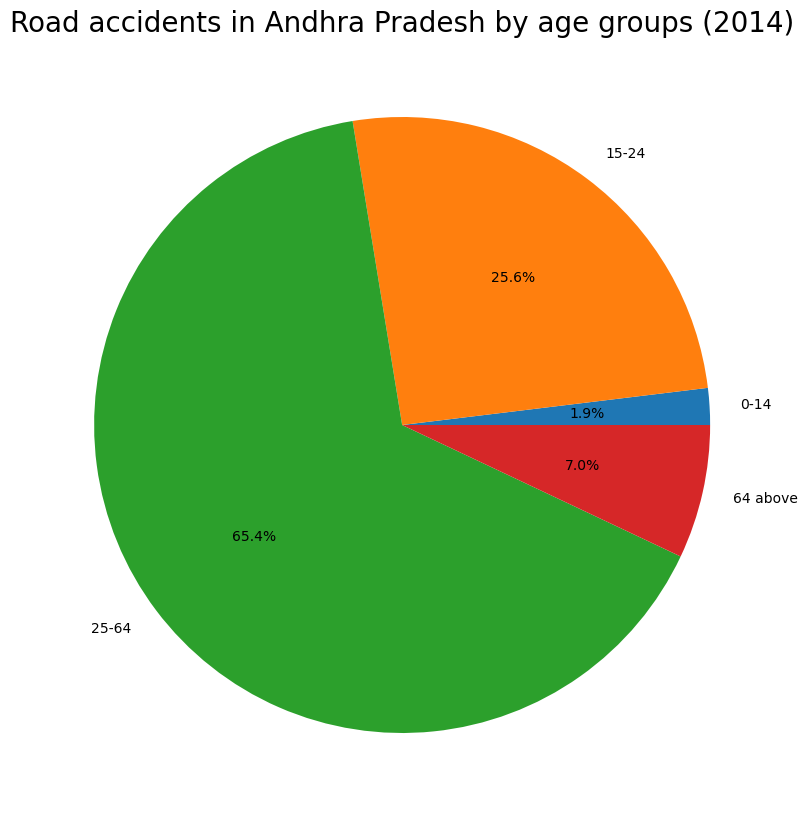

In [91]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Andhra Pradesh by age groups (2014)',size=20)

In [92]:
df_maha=df_age_2014.loc[14:14,:]

In [93]:
df_maha

,State/ UT,0-14,15-24,25-64,64 above
14,Maharashtra,0,2323,3490,1


In [94]:
unstack_df=df_maha.unstack()

unstack_df.reset_index(drop=True,inplace=True)

list1=[]
for i in range(1,5):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Maharashtra by age groups (2014)')

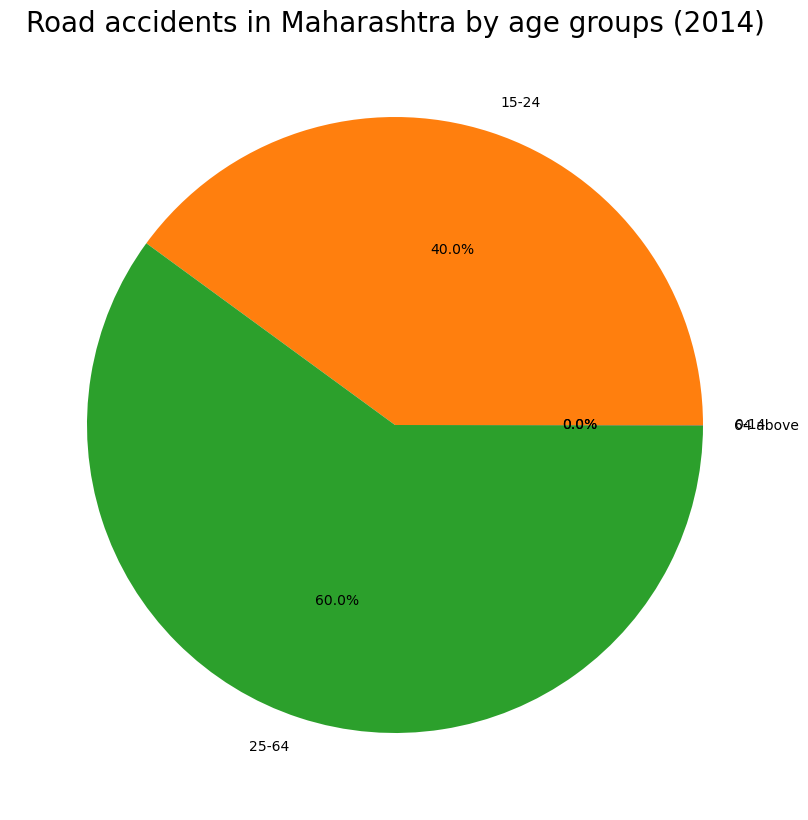

In [95]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Maharashtra by age groups (2014)',size=20)

In Maharashtra, no accidents are caused by underage driving or by senior citizens. This indicates strict traffic and police regulations against under age driving.

In [96]:
df_Kar=df_age_2014.copy()

In [97]:
df_Kar=df_Kar.iloc[11:12,:]
df_Kar

,State/ UT,0-14,15-24,25-64,64 above
11,Karnataka,14,1700,1517,241


In [98]:
unstack_df=df_Kar.unstack()

In [99]:
unstack_df.reset_index(drop=True,inplace=True)

In [100]:
list1=[]
for i in range(1,5):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Karnataka by age groups (2014)')

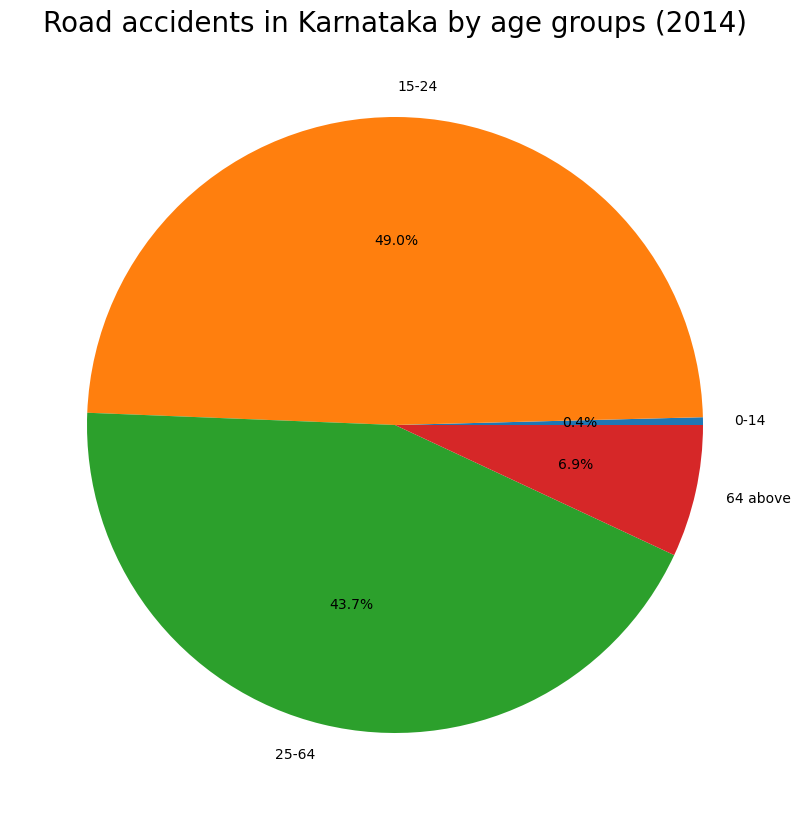

In [101]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Karnataka by age groups (2014)',size=20)